# Census Data
**the goal of this to make visualizations & have analysis of the census data** 

**I need bar graphs and the scatterplot with 2 y-axis (HHI & MEDIAN HOUESHOLD INCOME)**


In [88]:
import pandas as pd
import numpy as np 
import geopandas as gpd
import matplotlib 
from matplotlib import pyplot as plt 
pd.set_option('display.max_columns',None)
import seaborn as sns 
from shapely.geometry import Point, Polygon 


dataset = pd.read_csv('/srv/data/my_shared_data_folder/rafi/2022_Business_Academic_QCQ_grocery.csv')
dataset.drop(['Unnamed: 0'],inplace=True,axis=1)
dataset

pure = pd.read_csv('/srv/data/my_shared_data_folder/rafi/2022_Business_Academic_QCQ_grocery.csv')
pure.drop(['Unnamed: 0'],inplace=True,axis=1)



In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
pd.set_option('display.max_columns', None)
from shapely.geometry import Point
import seaborn as sns
import fiona
import math #Hi testing
import plotly.express as px
from thefuzz import fuzz
from thefuzz import process
import random
from sklearn.linear_model import LassoCV
import statsmodels.api as sm

In [90]:
census_data = pd.read_csv('../../rafi-grocery/data/census/acs_census_2021.csv')

census_data

#territories = ['72', '69', '66', '78','60','02','15']
#clean_census_data = census_counties.drop(census_counties[census_counties['STATEFP'].isin(territories)].index)
#clean_census_data


,Unnamed: 0,geo_id,census_name,total_population,total_male,total_female,under_5_years,median_age,over_18_years,over_65_years,white,black,native,asian,islander,other_race,more_one_race,latino,num_households_dp2,perc_hh_w_children,avg_household_size,avg_family_size,pop_in_households,pop_in_households_child,pop_enrolled,college_graduates,tot_pop_birth_native,tot_pop_birth_foreign,speaks_english_only,speaks_english_less_very_well,unemployment_rate,work_from_home,median_hh_income_d,average_hh_income_d,hh_social_security,hh_foodstamps_snap,per_capita_income_d,perc_fam_bellow_poverty,perc_ppl_bellow_poverty,state,county
0,0,0500000US01001,"Autauga County, Alabama",58239,28206,30033,3318,38.5,44438,8815,43755,11470,98,647,0,196,2073,1775,21856.0,34.1,2.64,3.20,57692.0,18266.0,13755.0,11144.0,56998.0,1241.0,52993.0,398.0,2.8,1254,62660,79498,7382,2298,30968,12.0,13.6,1,1
1,1,0500000US01003,"Baldwin County, Alabama",227131,110781,116350,12035,43.4,178105,46805,192034,19895,1259,2175,9,4163,7596,10634,87190.0,26.8,2.57,3.20,224205.0,63444.0,47081.0,52562.0,219193.0,7938.0,203884.0,4032.0,3.7,8013,64346,87709,33929,5839,35384,5.9,9.2,1,3
2,2,0500000US01005,"Barbour County, Alabama",25259,13361,11898,1320,40.2,19995,4801,11495,11985,77,106,1,977,618,1176,9088.0,31.0,2.45,3.15,22295.0,6777.0,5648.0,2007.0,24600.0,659.0,22207.0,597.0,8.6,137,36422,55066,4198,2331,21325,21.7,26.5,1,5
3,3,0500000US01007,"Bibb County, Alabama",22412,12300,10112,1196,39.7,17800,3594,17020,5003,21,46,0,21,301,634,7083.0,32.4,2.96,3.63,20972.0,6924.0,4223.0,1913.0,22167.0,245.0,20858.0,114.0,9.7,368,54277,67396,3346,1198,24787,13.4,16.9,1,7
4,4,0500000US01009,"Blount County, Alabama",58884,29530,29354,3467,41.1,45201,10584,54439,760,189,216,74,1243,1963,5612,21300.0,32.8,2.74,3.30,58352.0,17784.0,12696.0,6061.0,56234.0,2650.0,51064.0,1859.0,6.0,678,52830,71849,8238,2135,27309,9.3,13.2,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3216,3216,0500000US72145,"Vega Baja Municipio, Puerto Rico",54544,26057,28487,2192,43.1,44604,11463,30690,2409,50,9,0,8648,12738,53313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.6,328,21507,31473,9794,8044,12361,38.0,43.4,72,145
3217,3217,0500000US72147,"Vieques Municipio, Puerto Rico",8317,4239,4078,401,43.6,6760,1904,2592,629,0,14,0,4766,316,7662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.2,495,14942,21263,1217,1028,8834,45.2,53.2,72,147
3218,3218,0500000US72149,"Villalba Municipio, Puerto Rico",22341,10796,11545,1002,42.0,17811,4188,10502,1784,0,0,0,2351,7704,22259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.6,17,20722,33589,3843,4632,12179,40.9,44.5,72,149
3219,3219,0500000US72151,"Yabucoa Municipio, Puerto Rico",31047,15000,16047,1092,44.9,25533,6801,3190,16119,0,11,0,10889,838,31009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.2,1,17267,24723,6560,7203,10507,47.1,52.6,72,151


In [92]:
territories = ['72', '69', '66', '78','60','02','15']
clean_census_data = census_counties.drop(census_counties[census_counties['STATEFP'].isin(territories)].index)
clean_census_data


,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,21,007,00516850,0500000US21007,21007,Ballard,06,639387454,69473325,"POLYGON ((-89.18137 37.04630, -89.17938 37.053..."
1,21,017,00516855,0500000US21017,21017,Bourbon,06,750439351,4829777,"POLYGON ((-84.44266 38.28324, -84.44114 38.283..."
2,21,031,00516862,0500000US21031,21031,Butler,06,1103571974,13943044,"POLYGON ((-86.94486 37.07341, -86.94346 37.074..."
3,21,065,00516879,0500000US21065,21065,Estill,06,655509930,6516335,"POLYGON ((-84.12662 37.64540, -84.12483 37.646..."
4,21,069,00516881,0500000US21069,21069,Fleming,06,902727151,7182793,"POLYGON ((-83.98428 38.44549, -83.98246 38.450..."
...,...,...,...,...,...,...,...,...,...,...
3228,31,073,00835858,0500000US31073,31073,Gosper,06,1186616237,11831826,"POLYGON ((-100.09510 40.43866, -100.08937 40.4..."
3229,39,075,01074050,0500000US39075,39075,Holmes,06,1094405866,3695230,"POLYGON ((-82.22066 40.66758, -82.19327 40.667..."
3230,48,171,01383871,0500000US48171,48171,Gillespie,06,2740719114,9012764,"POLYGON ((-99.30400 30.49983, -99.28234 30.499..."
3231,55,079,01581100,0500000US55079,55079,Milwaukee,06,625440563,2455383635,"POLYGON ((-88.06959 42.86726, -88.06959 42.872..."


# census data ONLY for ALL OF CHICAGO COUNTIES

In [93]:
census_state_data = census_data[census_data['state'] == 17]
census_state_data
#census_state_data.loc[(census_state_data['census_name']=='Cook County, Illinois')]
#here I only got it to loc by Cook County

#demographic data ONLY for ALL OF CHICAGO COUNTIES


,Unnamed: 0,geo_id,census_name,total_population,total_male,total_female,under_5_years,median_age,over_18_years,over_65_years,white,black,native,asian,islander,other_race,more_one_race,latino,num_households_dp2,perc_hh_w_children,avg_household_size,avg_family_size,pop_in_households,pop_in_households_child,pop_enrolled,college_graduates,tot_pop_birth_native,tot_pop_birth_foreign,speaks_english_only,speaks_english_less_very_well,unemployment_rate,work_from_home,median_hh_income_d,average_hh_income_d,hh_social_security,hh_foodstamps_snap,per_capita_income_d,perc_fam_bellow_poverty,perc_ppl_bellow_poverty,state,county
596,596,0500000US17001,"Adams County, Illinois",65878,32414,33464,3967,41.2,50882,13153,60689,2615,51,420,8,153,1942,1146,27174.0,27.0,2.38,2.99,64574.0,18024.0,14644.0,11810.0,65003.0,875.0,60491.0,172.0,4.2,1936,58587,76259,9363,3563,32249,8.7,11.9,17,1
597,597,0500000US17003,"Alexander County, Illinois",5488,2652,2836,239,45.5,4242,1233,3502,1836,4,1,22,0,123,62,1781.0,18.0,3.00,4.34,5344.0,2071.0,1261.0,468.0,5460.0,28.0,5216.0,8.0,10.6,99,39871,52409,929,313,20271,15.4,24.5,17,3
598,598,0500000US17005,"Bond County, Illinois",16804,8877,7927,681,41.5,13668,3144,15120,1184,112,165,0,36,187,630,6094.0,30.3,2.43,3.06,14825.0,4064.0,4191.0,2534.0,16477.0,327.0,15647.0,153.0,3.8,465,53654,71898,2219,823,27335,10.2,15.1,17,5
599,599,0500000US17007,"Boone County, Illinois",53592,26786,26806,2902,38.8,40386,8596,44895,1437,160,523,0,4200,2377,12223,18897.0,35.4,2.82,3.31,53259.0,17524.0,13635.0,8795.0,48625.0,4967.0,41080.0,3171.0,8.2,1539,74076,93405,6000,2179,34116,6.1,9.3,17,7
600,600,0500000US17009,"Brown County, Illinois",6330,4067,2263,299,38.1,5227,891,4876,1174,39,3,0,135,103,436,1998.0,23.5,2.24,3.03,4469.0,1278.0,1214.0,601.0,6151.0,179.0,5686.0,87.0,1.5,147,59346,69410,597,206,23615,5.8,9.7,17,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,693,0500000US17195,"Whiteside County, Illinois",55932,28065,27867,3115,43.6,43534,11529,51386,589,75,339,67,866,2610,6964,23194.0,28.9,2.37,2.95,54920.0,15770.0,12105.0,7398.0,54193.0,1739.0,48954.0,1248.0,4.1,790,59812,76215,8666,2998,32428,9.0,12.1,17,195
694,694,0500000US17197,"Will County, Illinois",696403,347369,349034,39619,38.3,523977,91810,487812,79621,2948,39763,140,43346,42773,126302,237043.0,37.6,2.90,3.39,687576.0,238398.0,184424.0,162906.0,610361.0,86042.0,521895.0,48966.0,5.2,32857,95751,116288,63990,21134,40493,5.0,6.8,17,197
695,695,0500000US17199,"Williamson County, Illinois",67271,33700,33571,3832,41.1,52498,12672,60606,2717,151,887,0,676,2234,1858,28057.0,27.7,2.32,2.88,65148.0,17279.0,14845.0,12764.0,65999.0,1272.0,61088.0,597.0,4.7,1802,54682,73876,9875,3861,31295,10.4,13.9,17,199
696,696,0500000US17201,"Winnebago County, Illinois",285471,140109,145362,17837,39.6,218063,49935,212858,37961,738,8068,101,8582,17163,38627,115240.0,29.8,2.44,3.03,281286.0,82632.0,65851.0,45227.0,259752.0,25719.0,227562.0,12520.0,7.9,7717,57779,75845,38826,21123,31134,11.8,15.9,17,201


# census data  for ONLY CHICAGO METROPOLITAN COUNTIES 

In [94]:
counties = ['Cook County, Illinois', 'Lake County, Illinois', 'DuPage County, Illinois','Will County, Illinois','McHenry County, Illinois','Kane County,Illinois', 'Kane County, Illinois']  # replace with your actual counties
census_counties_data = census_state_data[census_state_data['census_name'].isin(counties)]

census_counties_data['county'] = census_counties_data['county'].astype(float)
census_counties_data

/tmp/ipykernel_2415386/817902683.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Unnamed: 0,geo_id,census_name,total_population,total_male,total_female,under_5_years,median_age,over_18_years,over_65_years,white,black,native,asian,islander,other_race,more_one_race,latino,num_households_dp2,perc_hh_w_children,avg_household_size,avg_family_size,pop_in_households,pop_in_households_child,pop_enrolled,college_graduates,tot_pop_birth_native,tot_pop_birth_foreign,speaks_english_only,speaks_english_less_very_well,unemployment_rate,work_from_home,median_hh_income_d,average_hh_income_d,hh_social_security,hh_foodstamps_snap,per_capita_income_d,perc_fam_bellow_poverty,perc_ppl_bellow_poverty,state,county
611,611,0500000US17031,"Cook County, Illinois",5265398,2570478,2694920,312408,37.3,4113751,774279,2740032,1211240,22867,396831,2068,523543,368817,1346949,2044658.0,28.1,2.53,3.33,5176131.0,1553695.0,1276692.0,1489931.0,4163385.0,1102013.0,3215693.0,673502.0,7.3,287499,72121,104880,535150,290776,41706,9.9,13.5,17,31.0
617,617,0500000US17043,"DuPage County, Illinois",934094,461851,472243,54019,39.7,721393,146886,677738,45922,2202,114491,375,37323,56043,135909,347385.0,32.5,2.65,3.20,921130.0,292539.0,240067.0,325349.0,751394.0,182700.0,630438.0,77913.0,4.8,67401,100292,133288,92573,21700,50344,4.3,6.1,17,43.0
640,640,0500000US17089,"Kane County, Illinois",518648,259680,258968,31939,38.0,387240,71843,356822,27863,3179,20688,379,64982,44735,167111,181263.0,36.8,2.83,3.34,513180.0,170984.0,139520.0,122594.0,430016.0,88632.0,334568.0,55656.0,5.2,28662,88935,115083,50155,19063,40661,6.1,8.4,17,89.0
644,644,0500000US17097,"Lake County, Illinois",714484,358911,355573,39917,38.5,542057,102890,499259,48075,3887,58802,424,53828,50209,159640,252731.0,35.1,2.75,3.28,695686.0,233551.0,191435.0,217451.0,581208.0,133276.0,477010.0,65001.0,5.5,45081,97127,136312,68366,21215,49440,5.2,7.6,17,97.0
651,651,0500000US17111,"McHenry County, Illinois",310749,155410,155339,16737,40.4,237841,46037,275551,4737,476,8440,5,5427,16113,42981,114446.0,34.8,2.70,3.12,308871.0,99397.0,77823.0,74658.0,283400.0,27349.0,253425.0,13138.0,5.1,17853,93801,115692,33060,7136,43047,4.6,6.3,17,111.0
694,694,0500000US17197,"Will County, Illinois",696403,347369,349034,39619,38.3,523977,91810,487812,79621,2948,39763,140,43346,42773,126302,237043.0,37.6,2.90,3.39,687576.0,238398.0,184424.0,162906.0,610361.0,86042.0,521895.0,48966.0,5.2,32857,95751,116288,63990,21134,40493,5.0,6.8,17,197.0


# Updated Dataframe that removes unwanted territories

In [95]:
census_counties = gpd.read_file('../../rafi-grocery/data/county shape file/cb_2018_us_county_500k.shp')
census_counties.head()
territories = ['72', '69', '66', '78','60','02','15']
updated_census_counties = census_counties.drop(census_counties[census_counties['STATEFP'].isin(territories)].index)
updated_census_counties.head()


,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,21,007,00516850,0500000US21007,21007,Ballard,06,639387454,69473325,"POLYGON ((-89.18137 37.04630, -89.17938 37.053..."
1,21,017,00516855,0500000US21017,21017,Bourbon,06,750439351,4829777,"POLYGON ((-84.44266 38.28324, -84.44114 38.283..."
2,21,031,00516862,0500000US21031,21031,Butler,06,1103571974,13943044,"POLYGON ((-86.94486 37.07341, -86.94346 37.074..."
3,21,065,00516879,0500000US21065,21065,Estill,06,655509930,6516335,"POLYGON ((-84.12662 37.64540, -84.12483 37.646..."
4,21,069,00516881,0500000US21069,21069,Fleming,06,902727151,7182793,"POLYGON ((-83.98428 38.44549, -83.98246 38.450..."


# beginning plotting

<Axes: >

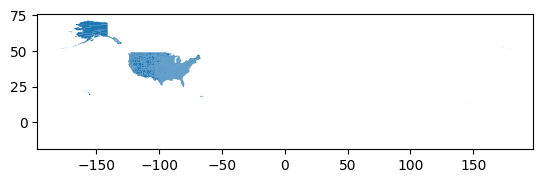

In [39]:
census_counties.plot()

# Dataframe w/ census information about Chicago & Visualizations (contains coordinates) 

In [96]:
updated_counties2 = census_counties[census_counties['STATEFP']=='17']
rename_census2 = updated_counties2.rename(columns ={ 'STATEFP':'STATE','COUNTYFP':'COUNTY CODE'})
rename_census2

,STATE,COUNTY CODE,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
11,17,091,00424247,0500000US17091,17091,Kankakee,06,1752121058,12440760,"POLYGON ((-88.25150 41.11422, -88.24089 41.114..."
12,17,187,01785134,0500000US17187,17187,Warren,06,1404747944,1674135,"POLYGON ((-90.78965 40.63685, -90.78956 40.642..."
13,17,197,01785190,0500000US17197,17197,Will,06,2164927644,34548925,"POLYGON ((-88.26127 41.72466, -88.25477 41.724..."
288,17,027,00424215,0500000US17027,17027,Clinton,06,1227664369,75635324,"POLYGON ((-89.70695 38.65503, -89.68784 38.655..."
289,17,031,01784766,0500000US17031,17031,Cook,06,2447370818,1786313044,"POLYGON ((-88.26364 42.06687, -88.25835 42.066..."
...,...,...,...,...,...,...,...,...,...,...
3029,17,143,01784920,0500000US17143,17143,Peoria,06,1602352656,30706564,"POLYGON ((-89.98860 40.62801, -89.98889 40.629..."
3039,17,169,01785037,0500000US17169,17169,Schuyler,06,1132511778,10511618,"POLYGON ((-90.91288 40.14382, -90.91197 40.193..."
3040,17,171,00424286,0500000US17171,17171,Scott,06,649861225,4812707,"POLYGON ((-90.64599 39.70337, -90.64525 39.706..."
3067,17,199,01785215,0500000US17199,17199,Williamson,06,1088263100,62602559,"POLYGON ((-89.15264 37.68680, -89.15238 37.712..."


<Axes: >

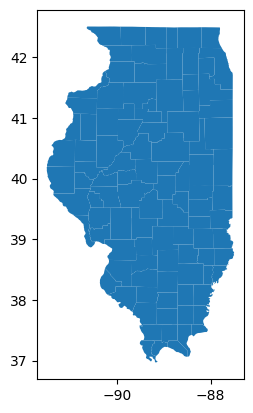

In [97]:
updated_counties2.plot()

<Axes: >

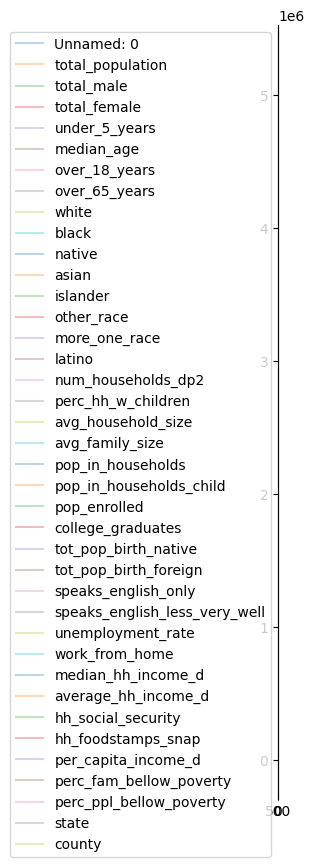

In [100]:
# plotting the isochrones
ax = updated_counties2.plot(figsize=(10, 10), color='white', linestyle=':', edgecolor='black')
census_counties_data.plot(ax=ax, alpha = 0.3, column='black')



NameError: name 'merged_data' is not defined

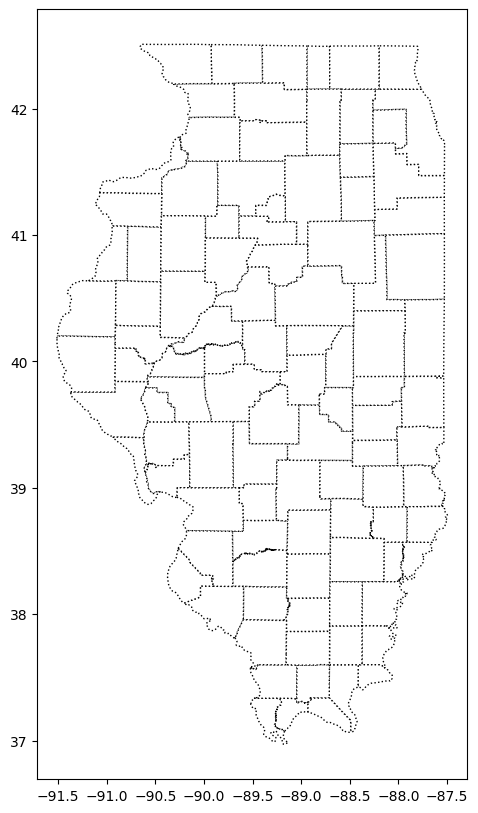

In [101]:
# plotting the isochrones
ax = updated_counties2.plot(figsize=(10, 10), color='white', linestyle=':', edgecolor='black')
merged_data.plot(ax=ax, alpha = 0.3, column='native')

In [102]:
# Replace 'df' with the name of your DataFrame
updated_counties2['STATEFP'] = updated_counties2['STATEFP'].replace('17', 'Illinois')


updated_counties2['census_name'] = updated_counties2['NAME'].str.cat(updated_counties2['STATEFP'], sep=' County, ')
updated_counties2 #merged dataset

/opt/tljh/user/lib/python3.9/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/tljh/user/lib/python3.9/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,census_name
11,Illinois,091,00424247,0500000US17091,17091,Kankakee,06,1752121058,12440760,"POLYGON ((-88.25150 41.11422, -88.24089 41.114...","Kankakee County, Illinois"
12,Illinois,187,01785134,0500000US17187,17187,Warren,06,1404747944,1674135,"POLYGON ((-90.78965 40.63685, -90.78956 40.642...","Warren County, Illinois"
13,Illinois,197,01785190,0500000US17197,17197,Will,06,2164927644,34548925,"POLYGON ((-88.26127 41.72466, -88.25477 41.724...","Will County, Illinois"
288,Illinois,027,00424215,0500000US17027,17027,Clinton,06,1227664369,75635324,"POLYGON ((-89.70695 38.65503, -89.68784 38.655...","Clinton County, Illinois"
289,Illinois,031,01784766,0500000US17031,17031,Cook,06,2447370818,1786313044,"POLYGON ((-88.26364 42.06687, -88.25835 42.066...","Cook County, Illinois"
...,...,...,...,...,...,...,...,...,...,...,...
3029,Illinois,143,01784920,0500000US17143,17143,Peoria,06,1602352656,30706564,"POLYGON ((-89.98860 40.62801, -89.98889 40.629...","Peoria County, Illinois"
3039,Illinois,169,01785037,0500000US17169,17169,Schuyler,06,1132511778,10511618,"POLYGON ((-90.91288 40.14382, -90.91197 40.193...","Schuyler County, Illinois"
3040,Illinois,171,00424286,0500000US17171,17171,Scott,06,649861225,4812707,"POLYGON ((-90.64599 39.70337, -90.64525 39.706...","Scott County, Illinois"
3067,Illinois,199,01785215,0500000US17199,17199,Williamson,06,1088263100,62602559,"POLYGON ((-89.15264 37.68680, -89.15238 37.712...","Williamson County, Illinois"


In [104]:
merged_data = pd.merge(updated_counties2,census_counties_data,how = "left", on = ["census_name"])
merged_data 

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,census_name,Unnamed: 0,geo_id,total_population,total_male,total_female,under_5_years,median_age,over_18_years,over_65_years,white,black,native,asian,islander,other_race,more_one_race,latino,num_households_dp2,perc_hh_w_children,avg_household_size,avg_family_size,pop_in_households,pop_in_households_child,pop_enrolled,college_graduates,tot_pop_birth_native,tot_pop_birth_foreign,speaks_english_only,speaks_english_less_very_well,unemployment_rate,work_from_home,median_hh_income_d,average_hh_income_d,hh_social_security,hh_foodstamps_snap,per_capita_income_d,perc_fam_bellow_poverty,perc_ppl_bellow_poverty,state,county
0,Illinois,091,00424247,0500000US17091,17091,Kankakee,06,1752121058,12440760,"POLYGON ((-88.25150 41.11422, -88.24089 41.114...","Kankakee County, Illinois",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Illinois,187,01785134,0500000US17187,17187,Warren,06,1404747944,1674135,"POLYGON ((-90.78965 40.63685, -90.78956 40.642...","Warren County, Illinois",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Illinois,197,01785190,0500000US17197,17197,Will,06,2164927644,34548925,"POLYGON ((-88.26127 41.72466, -88.25477 41.724...","Will County, Illinois",694.0,0500000US17197,696403.0,347369.0,349034.0,39619.0,38.3,523977.0,91810.0,487812.0,79621.0,2948.0,39763.0,140.0,43346.0,42773.0,126302.0,237043.0,37.6,2.90,3.39,687576.0,238398.0,184424.0,162906.0,610361.0,86042.0,521895.0,48966.0,5.2,32857.0,95751.0,116288.0,63990.0,21134.0,40493.0,5.0,6.8,17.0,197.0
3,Illinois,027,00424215,0500000US17027,17027,Clinton,06,1227664369,75635324,"POLYGON ((-89.70695 38.65503, -89.68784 38.655...","Clinton County, Illinois",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Illinois,031,01784766,0500000US17031,17031,Cook,06,2447370818,1786313044,"POLYGON ((-88.26364 42.06687, -88.25835 42.066...","Cook County, Illinois",611.0,0500000US17031,5265398.0,2570478.0,2694920.0,312408.0,37.3,4113751.0,774279.0,2740032.0,1211240.0,22867.0,396831.0,2068.0,523543.0,368817.0,1346949.0,2044658.0,28.1,2.53,3.33,5176131.0,1553695.0,1276692.0,1489931.0,4163385.0,1102013.0,3215693.0,673502.0,7.3,287499.0,72121.0,104880.0,535150.0,290776.0,41706.0,9.9,13.5,17.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Illinois,143,01784920,0500000US17143,17143,Peoria,06,1602352656,30706564,"POLYGON ((-89.98860 40.62801, -89.98889 40.629...","Peoria County, Illinois",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,Illinois,169,01785037,0500000US17169,17169,Schuyler,06,1132511778,10511618,"POLYGON ((-90.91288 40.14382, -90.91197 40.193...","Schuyler County, Illinois",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,Illinois,171,00424286,0500000US17171,17171,Scott,06,649861225,4812707,"POLYGON ((-90.64599 39.70337, -90.64525 39.706...","Scott County, Illinois",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,Illinois,199,01785215,0500000US17199,17199,Williamson,06,1088263100,62602559,"POLYGON ((-89.15264 37.68680, -89.15238 37.712...","Williamson County, Illinois",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [105]:
counties2 = ['Cook County, Illinois', 'Lake County, Illinois', 'DuPage County, Illinois','Will County, Illinois','McHenry County, Illinois','Kane County,Illinois', 'Kendall County, Illinois']  # replace with your actual counties
census_counties_data = census_state_data[census_state_data['census_name'].isin(counties)]
census_counties_data

,Unnamed: 0,geo_id,census_name,total_population,total_male,total_female,under_5_years,median_age,over_18_years,over_65_years,white,black,native,asian,islander,other_race,more_one_race,latino,num_households_dp2,perc_hh_w_children,avg_household_size,avg_family_size,pop_in_households,pop_in_households_child,pop_enrolled,college_graduates,tot_pop_birth_native,tot_pop_birth_foreign,speaks_english_only,speaks_english_less_very_well,unemployment_rate,work_from_home,median_hh_income_d,average_hh_income_d,hh_social_security,hh_foodstamps_snap,per_capita_income_d,perc_fam_bellow_poverty,perc_ppl_bellow_poverty,state,county
611,611,0500000US17031,"Cook County, Illinois",5265398,2570478,2694920,312408,37.3,4113751,774279,2740032,1211240,22867,396831,2068,523543,368817,1346949,2044658.0,28.1,2.53,3.33,5176131.0,1553695.0,1276692.0,1489931.0,4163385.0,1102013.0,3215693.0,673502.0,7.3,287499,72121,104880,535150,290776,41706,9.9,13.5,17,31
617,617,0500000US17043,"DuPage County, Illinois",934094,461851,472243,54019,39.7,721393,146886,677738,45922,2202,114491,375,37323,56043,135909,347385.0,32.5,2.65,3.20,921130.0,292539.0,240067.0,325349.0,751394.0,182700.0,630438.0,77913.0,4.8,67401,100292,133288,92573,21700,50344,4.3,6.1,17,43
640,640,0500000US17089,"Kane County, Illinois",518648,259680,258968,31939,38.0,387240,71843,356822,27863,3179,20688,379,64982,44735,167111,181263.0,36.8,2.83,3.34,513180.0,170984.0,139520.0,122594.0,430016.0,88632.0,334568.0,55656.0,5.2,28662,88935,115083,50155,19063,40661,6.1,8.4,17,89
644,644,0500000US17097,"Lake County, Illinois",714484,358911,355573,39917,38.5,542057,102890,499259,48075,3887,58802,424,53828,50209,159640,252731.0,35.1,2.75,3.28,695686.0,233551.0,191435.0,217451.0,581208.0,133276.0,477010.0,65001.0,5.5,45081,97127,136312,68366,21215,49440,5.2,7.6,17,97
651,651,0500000US17111,"McHenry County, Illinois",310749,155410,155339,16737,40.4,237841,46037,275551,4737,476,8440,5,5427,16113,42981,114446.0,34.8,2.70,3.12,308871.0,99397.0,77823.0,74658.0,283400.0,27349.0,253425.0,13138.0,5.1,17853,93801,115692,33060,7136,43047,4.6,6.3,17,111
694,694,0500000US17197,"Will County, Illinois",696403,347369,349034,39619,38.3,523977,91810,487812,79621,2948,39763,140,43346,42773,126302,237043.0,37.6,2.90,3.39,687576.0,238398.0,184424.0,162906.0,610361.0,86042.0,521895.0,48966.0,5.2,32857,95751,116288,63990,21134,40493,5.0,6.8,17,197


<Axes: >

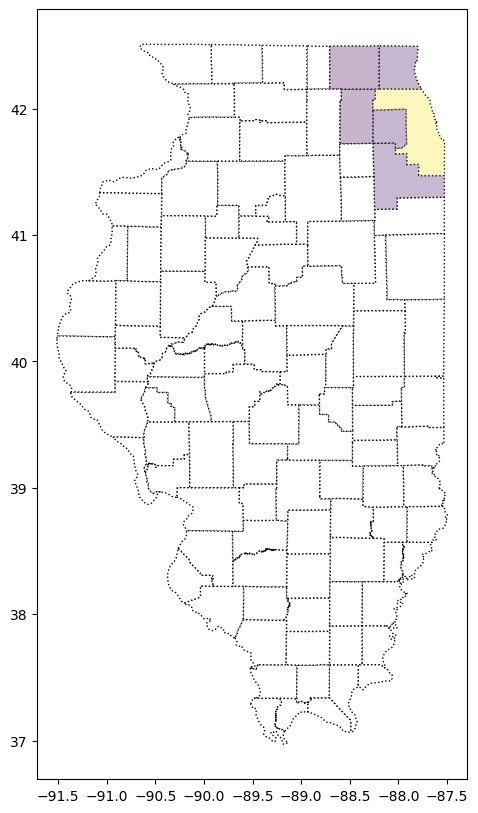

In [106]:
# plotting the isochrones
ax = updated_counties2.plot(figsize=(10, 10), color='white', linestyle=':', edgecolor='black')
merged_data.plot(ax=ax, alpha = 0.3, column='black')
#this is the working code with the colors 


<Axes: >

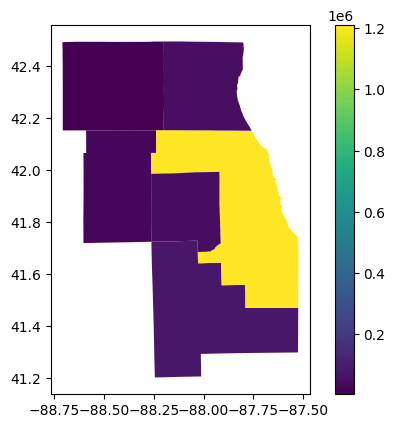

In [108]:
merged_data.plot(column="black", legend=True)
#this is also working code

<Axes: >

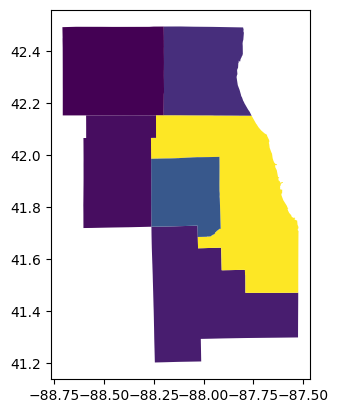

In [109]:
merged_data.plot(column="asian")

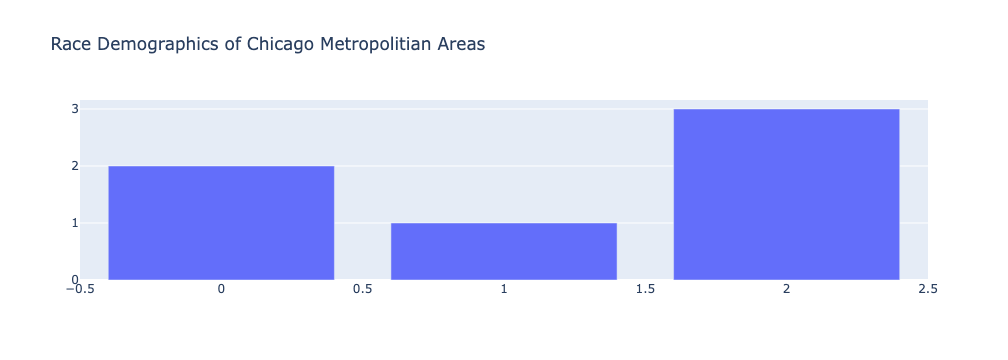

In [50]:

import plotly.graph_objects as go
fig = go.Figure(
    data=[go.Bar(y=[2, 1, 3])],
    layout_title_text="Race Demographics of Chicago Metropolitian Areas"
)
fig

# Demographics Per metropolitican area by County visualizations

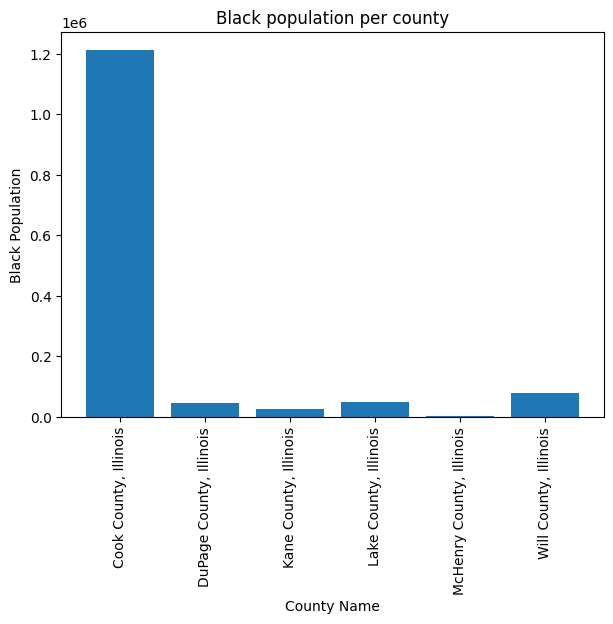

In [110]:
plt.figure(figsize=(7,5)) 
plt.bar(x = census_counties_data['census_name'], height= census_counties_data['black'])

plt.xlabel('County Name')          # x-label added, switched due to orientation
plt.ylabel('Black Population')                      # y-label added, switched due to orientation
plt.title('Black population per county')  # title added
plt.xticks(rotation=90)    
plt.show()



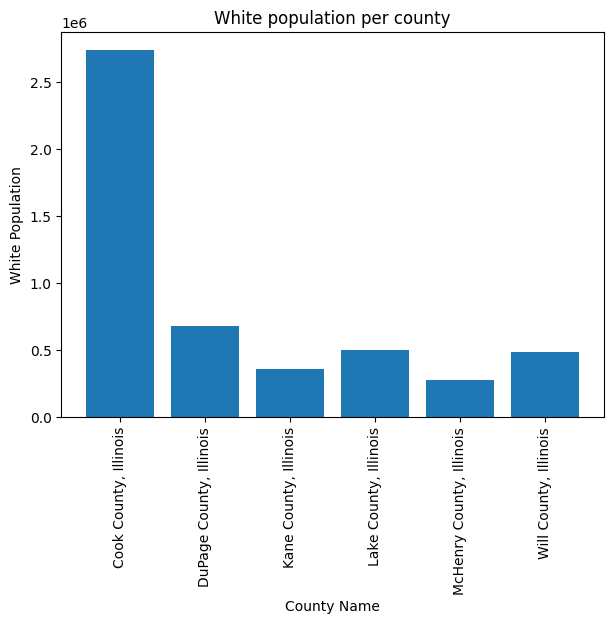

In [111]:
plt.figure(figsize=(7,5)) 
plt.bar(x = census_counties_data['census_name'], height= census_counties_data['white'])

plt.xlabel('County Name')          # x-label added, switched due to orientation
plt.ylabel('White Population')                      # y-label added, switched due to orientation
plt.title('White population per county')  # title added
plt.xticks(rotation=90)    
plt.show()



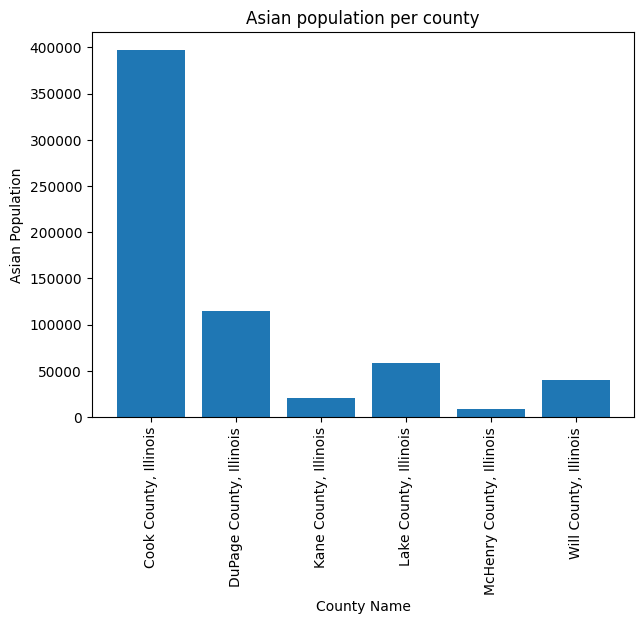

In [112]:
plt.figure(figsize=(7,5)) 
plt.bar(x = census_counties_data['census_name'], height= census_counties_data['asian'])

plt.xlabel('County Name')          # x-label added, switched due to orientation
plt.ylabel('Asian Population')                      # y-label added, switched due to orientation
plt.title('Asian population per county')  # title added
plt.xticks(rotation=90)    
plt.show()



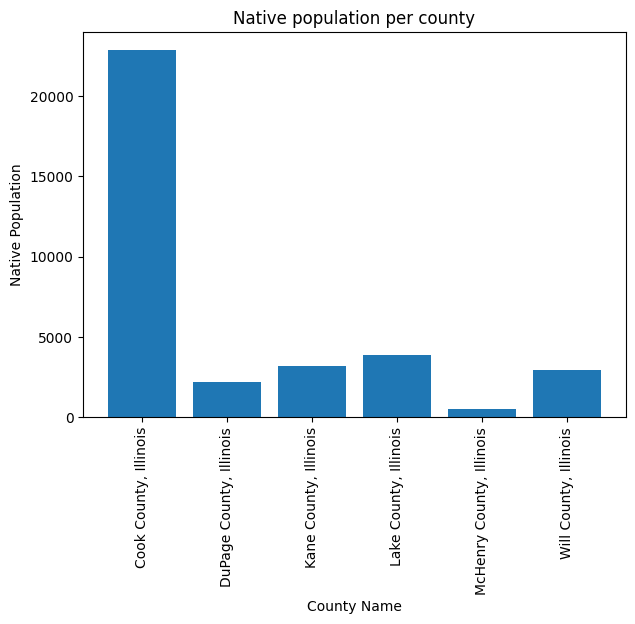

In [113]:
plt.figure(figsize=(7,5)) 
plt.bar(x = census_counties_data['census_name'], height= census_counties_data['native'])

plt.xlabel('County Name')          # x-label added, switched due to orientation
plt.ylabel('Native Population')                      # y-label added, switched due to orientation
plt.title('Native population per county')  # title added
plt.xticks(rotation=90)    
plt.show()



NameError: name 'species' is not defined

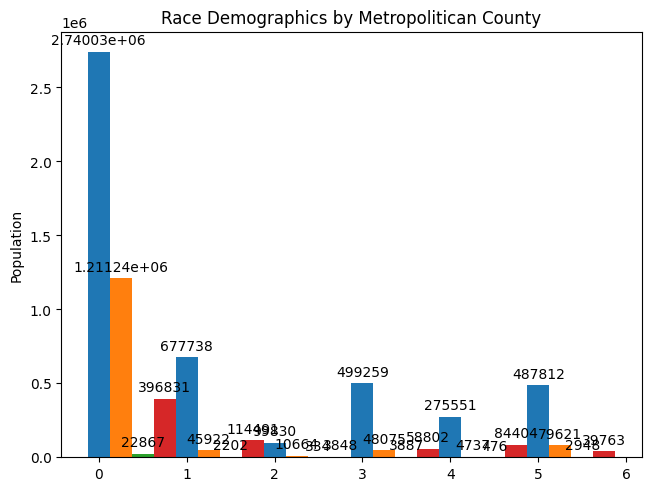

In [114]:
import matplotlib.pyplot as plt
import numpy as np

CHI_metro_counties = ("Cook County", "DuPage County", "Kendall County","Lake County", "McHenry County", "Will County")
population_size = {
    'white': (2740032, 677738, 99830, 499259, 275551,487812),
    'black': (1211240, 45922, 10664,48075,4737,79621),
    'native': (22867, 2202, 334,3887,476,2948),
    'asian': (396831,114491,3848,58802,84404,39763)
    

}

x = np.arange(len(CHI_metro_counties))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in population_size.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Population')
ax.set_title('Race Demographics by Metropolitican County')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250)

plt.show()


ValueError: The number of FixedLocator locations (6), usually from a call to set_ticks, does not match the number of labels (4).

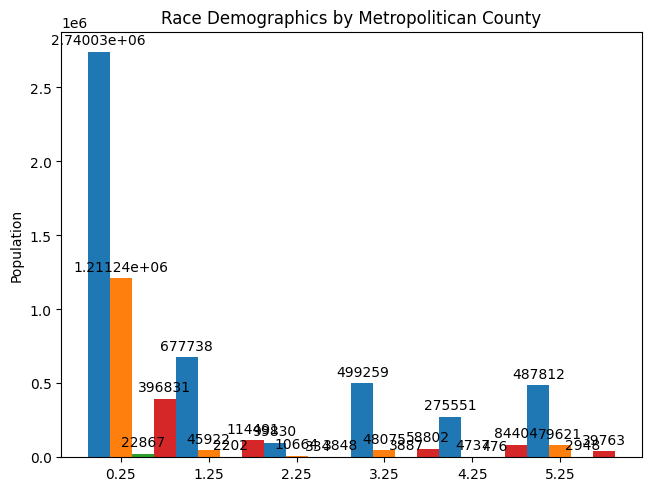

In [115]:
import matplotlib.pyplot as plt
import numpy as np

CHI_metro_counties = ("Cook County", "DuPage County", "Kendall County","Lake County", "McHenry County", "Will County")
population_size = {
    'white': (2740032, 677738, 99830, 499259, 275551,487812),
    'black': (1211240, 45922, 10664,48075,4737,79621),
    'native': (22867, 2202, 334,3887,476,2948),
    'asian': (396831,114491,3848,58802,84404,39763)
    

}

x = np.arange(len(CHI_metro_counties))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in population_size.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Population')
ax.set_title('Race Demographics by Metropolitican County')
ax.set_xticks(x + width, population_size)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 250)

plt.show()


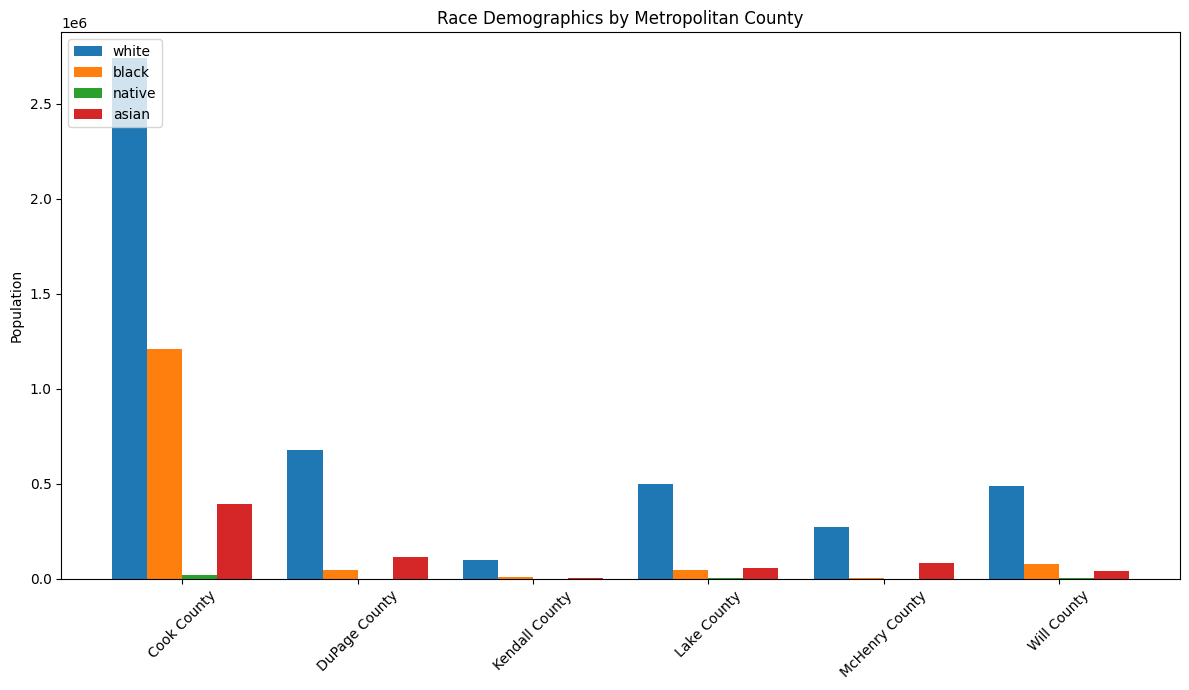

In [116]:
import matplotlib.pyplot as plt
import numpy as np

CHI_metro_counties = ("Cook County", "DuPage County", "Kendall County", "Lake County", "McHenry County", "Will County")
population_size = {
    'white': (2740032, 677738, 99830, 499259, 275551, 487812),
    'black': (1211240, 45922, 10664, 48075, 4737, 79621),
    'native': (22867, 2202, 334, 3887, 476, 2948),
    'asian': (396831, 114491, 3848, 58802, 84404, 39763)
    
}

x = np.arange(len(CHI_metro_counties))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(12, 7))

for attribute, measurement in population_size.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Population')
ax.set_title('Race Demographics by Metropolitan County')
ax.set_xticks(x + 1.5*width)  # Center the ticks in the middle of the group of bars
ax.set_xticklabels(CHI_metro_counties)
ax.legend(loc='upper left', ncol=1)

plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout for better appearance
plt.show()


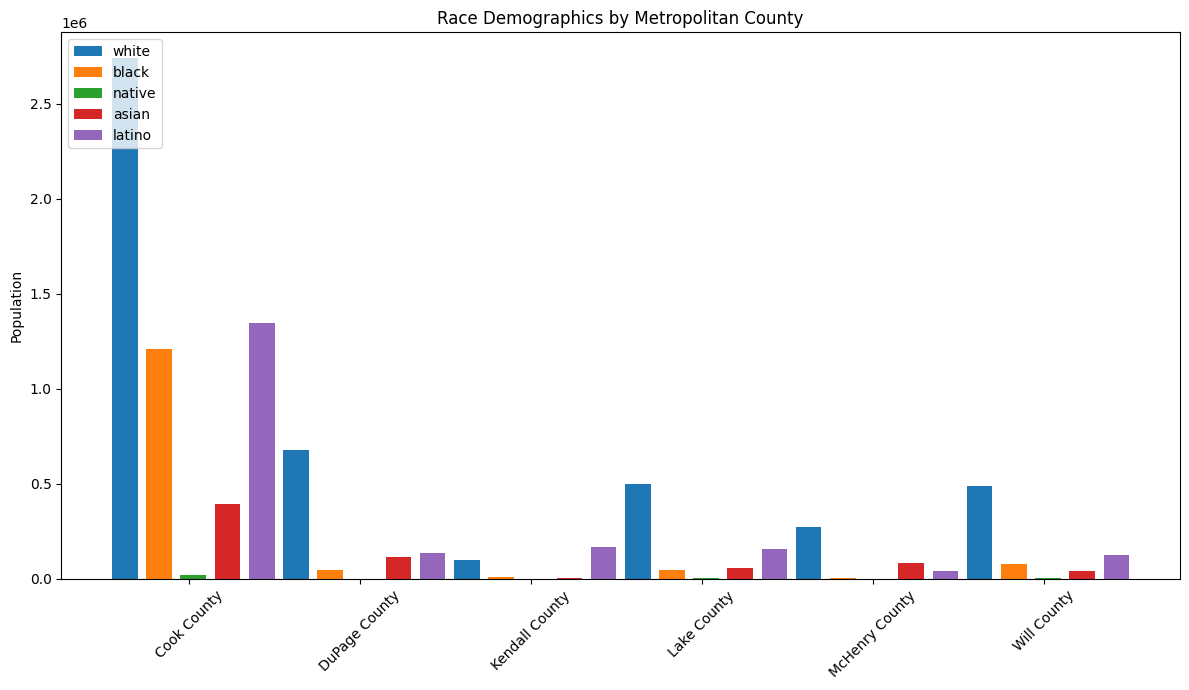

In [172]:
import matplotlib.pyplot as plt
import numpy as np

CHI_metro_counties = ("Cook County", "DuPage County", "Kendall County", "Lake County", "McHenry County", "Will County")
population_size = {
    'white': (2740032, 677738, 99830, 499259, 275551, 487812),
    'black': (1211240, 45922, 10664, 48075, 4737, 79621),
    'native': (22867, 2202, 334, 3887, 476, 2948),
    'asian': (396831, 114491, 3848, 58802, 84404, 39763),
    'latino':(1346949,135909,167111,159640,42981,126302)
}

x = np.arange(len(CHI_metro_counties))  # the label locations
width = 0.15  # Slightly reduced width for the bars
space_between_bars = 0.05
multiplier = 0

fig, ax = plt.subplots(figsize=(12, 7))

for attribute, measurement in population_size.items():
    offset = (width + space_between_bars) * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Population')
ax.set_title('Race Demographics by Metropolitan County')
ax.set_xticks(x + 2.5*width)  # Adjust the centering of the ticks
ax.set_xticklabels(CHI_metro_counties)
ax.legend(loc='upper left', ncol=1)

plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout for better appearance
plt.show()


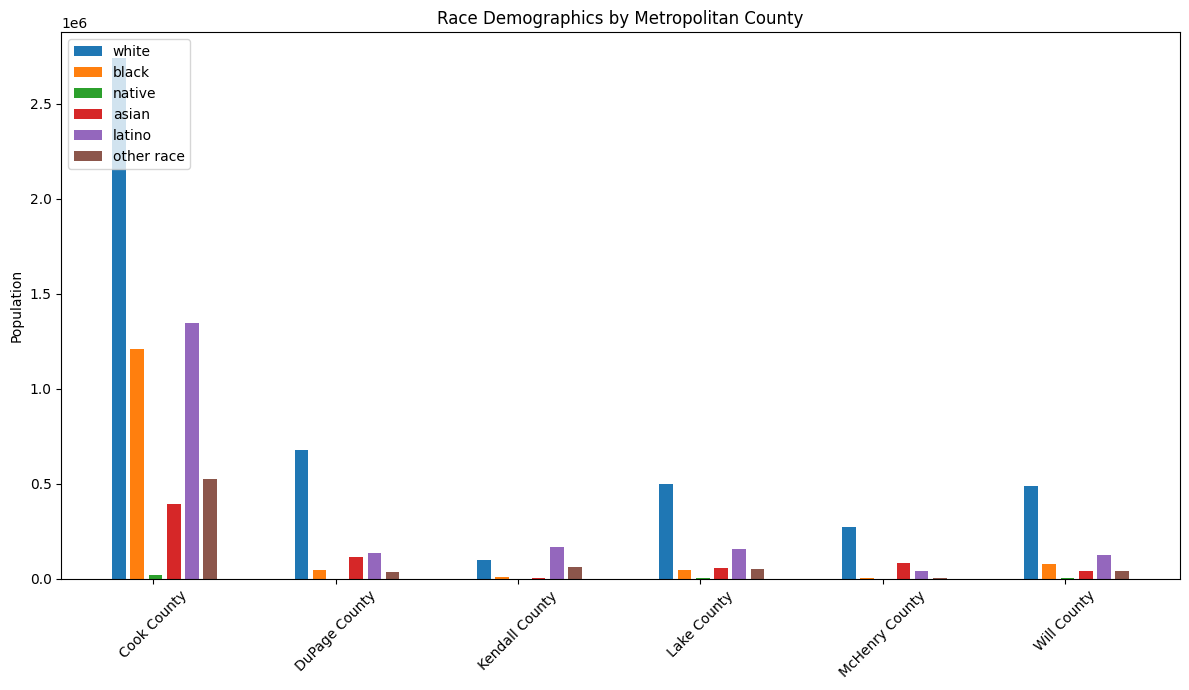

In [175]:
import matplotlib.pyplot as plt
import numpy as np

CHI_metro_counties = ("Cook County", "DuPage County", "Kendall County", "Lake County", "McHenry County", "Will County")
population_size = {
    'white': (2740032, 677738, 99830, 499259, 275551, 487812),
    'black': (1211240, 45922, 10664, 48075, 4737, 79621),
    'native': (22867, 2202, 334, 3887, 476, 2948),
    'asian': (396831, 114491, 3848, 58802, 84404, 39763),
    'latino':(1346949,135909,167111,159640,42981,126302),
    'other race':(523543,37323,64982,53828,5427,43346)
}

# Multiply x values by a factor (2 in this case) to spread bars out
x = np.arange(0, 2*len(CHI_metro_counties), 2)  # Modified line

width = 0.15  
space_between_bars = 0.05
multiplier = 0

fig, ax = plt.subplots(figsize=(12, 7))

for attribute, measurement in population_size.items():
    offset = (width + space_between_bars) * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

ax.set_ylabel('Population')
ax.set_title('Race Demographics by Metropolitan County')
ax.set_xticks(x + 2.5*width)  # Center the ticks
ax.set_xticklabels(CHI_metro_counties)
ax.legend(loc='upper left', ncol=1)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


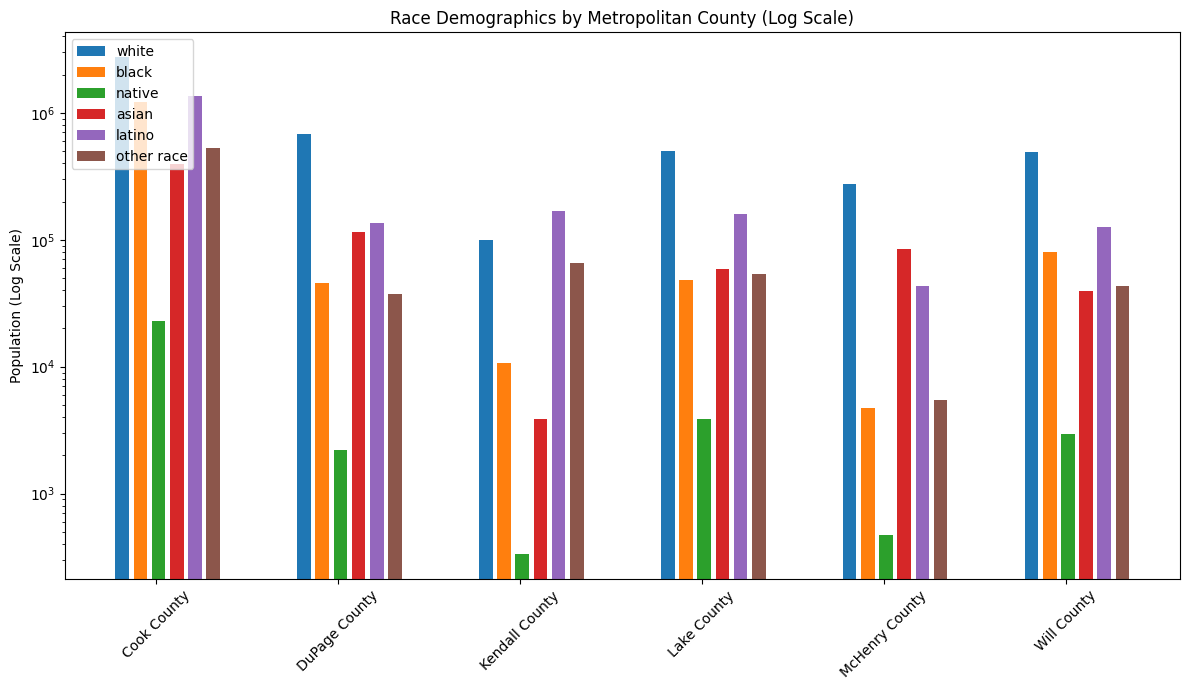

In [182]:
import matplotlib.pyplot as plt
import numpy as np

CHI_metro_counties = ("Cook County", "DuPage County", "Kendall County", "Lake County", "McHenry County", "Will County")
population_size = {
    'white': (2740032, 677738, 99830, 499259, 275551, 487812),
    'black': (1211240, 45922, 10664, 48075, 4737, 79621),
    'native': (22867, 2202, 334, 3887, 476, 2948),
    'asian': (396831, 114491, 3848, 58802, 84404, 39763),
    'latino':(1346949,135909,167111,159640,42981,126302),
    'other race':(523543,37323,64982,53828,5427,43346)
}

# Multiply x values by a factor (2 in this case) to spread bars out
x = np.arange(0, 2*len(CHI_metro_counties), 2)  # Modified line

width = 0.15  
space_between_bars = 0.05
multiplier = 0

fig, ax = plt.subplots(figsize=(12, 7))

for attribute, measurement in population_size.items():
    offset = (width + space_between_bars) * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

ax.set_ylabel('Population (Log Scale)')
ax.set_title('Race Demographics by Metropolitan County (Log Scale)')
ax.set_xticks(x + 2.5*width)  # Center the ticks
ax.set_xticklabels(CHI_metro_counties)
ax.legend(loc='upper left', ncol=1)

ax.set_yscale('log')  # Set y-axis to log scale

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


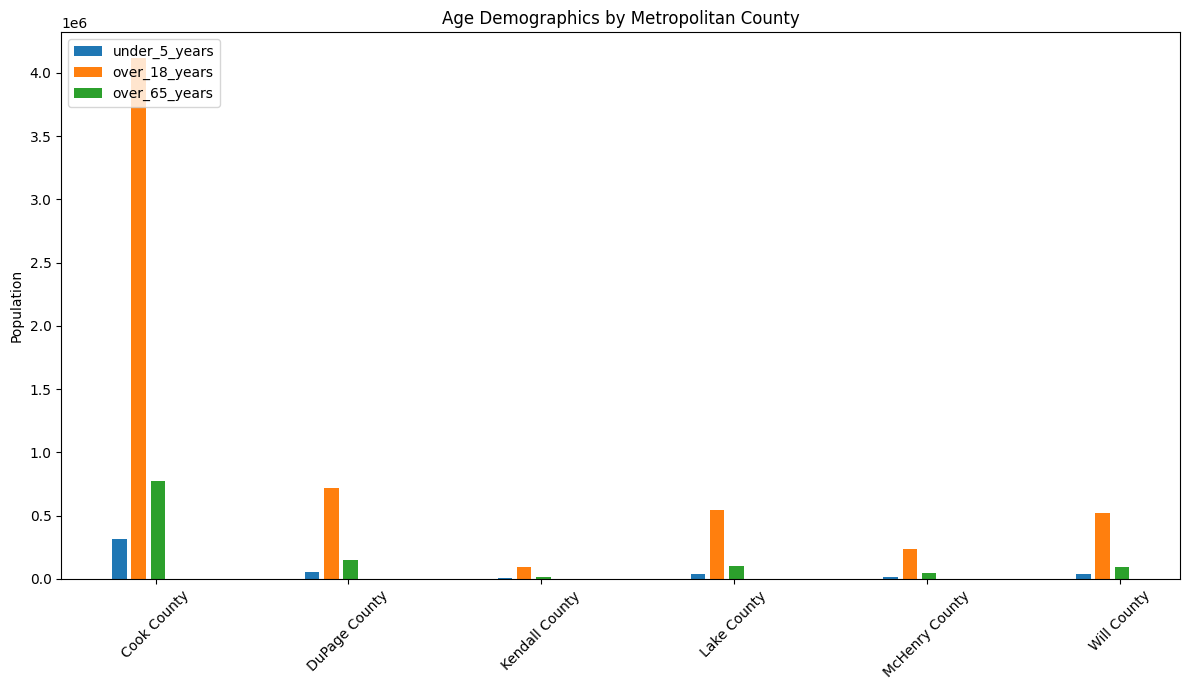

In [178]:
#using age instead of race

import matplotlib.pyplot as plt
import numpy as np

CHI_metro_counties = ("Cook County", "DuPage County", "Kendall County", "Lake County", "McHenry County", "Will County")
population_size = {
    'under_5_years': (312408,54019,8289,39917,16737,39619),
    'over_18_years': (4113751,721393,93603,542057,237841,523977,),
    'over_65_years': (774279,146886,13534,102890,46037,91810,)
}

# Multiply x values by a factor (2 in this case) to spread bars out
x = np.arange(0, 2*len(CHI_metro_counties), 2)  # Modified line

width = 0.15  
space_between_bars = 0.05
multiplier = 0

fig, ax = plt.subplots(figsize=(12, 7))

for attribute, measurement in population_size.items():
    offset = (width + space_between_bars) * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

ax.set_ylabel('Population')
ax.set_title('Age Demographics by Metropolitan County')
ax.set_xticks(x + 2.5*width)  # Center the ticks
ax.set_xticklabels(CHI_metro_counties)
ax.legend(loc='upper left', ncol=1)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


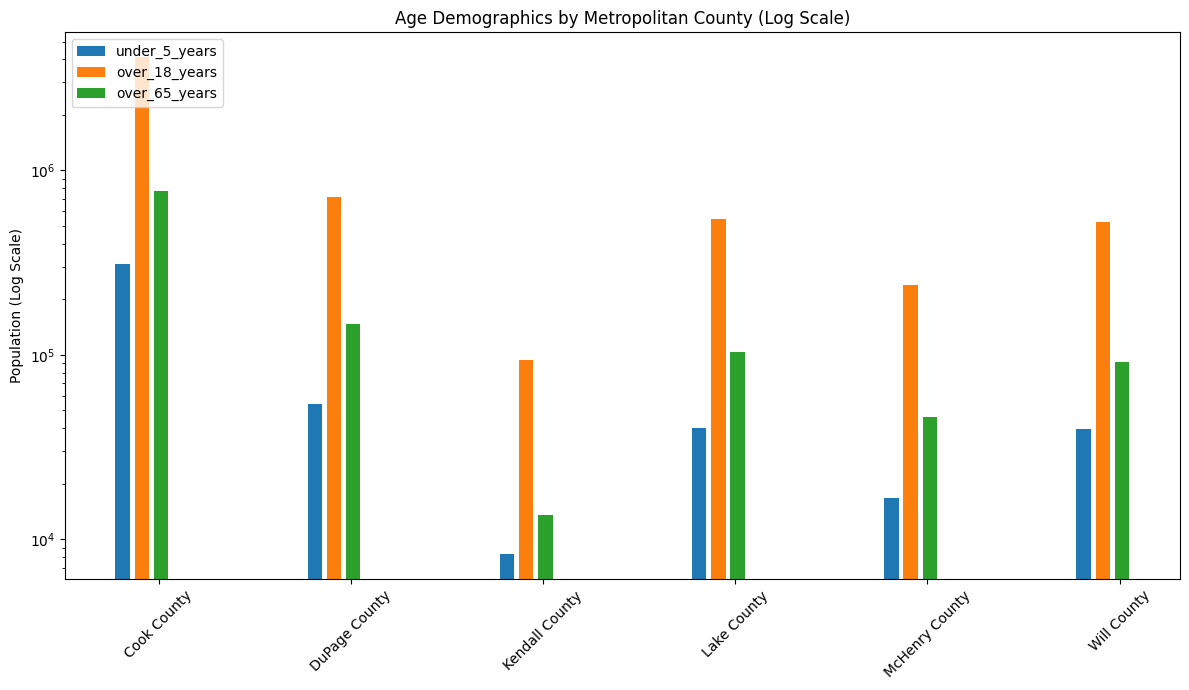

In [181]:
import matplotlib.pyplot as plt
import numpy as np

CHI_metro_counties = ("Cook County", "DuPage County", "Kendall County", "Lake County", "McHenry County", "Will County")
population_size = {
    'under_5_years': (312408, 54019, 8289, 39917, 16737, 39619),
    'over_18_years': (4113751, 721393, 93603, 542057, 237841, 523977,),
    'over_65_years': (774279, 146886, 13534, 102890, 46037, 91810,)
}

# Multiply x values by a factor (2 in this case) to spread bars out
x = np.arange(0, 2*len(CHI_metro_counties), 2)  # Modified line

width = 0.15  
space_between_bars = 0.05
multiplier = 0

fig, ax = plt.subplots(figsize=(12, 7))

for attribute, measurement in population_size.items():
    offset = (width + space_between_bars) * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

ax.set_ylabel('Population (Log Scale)')
ax.set_title('Age Demographics by Metropolitan County (Log Scale)')
ax.set_xticks(x + 2.5*width)  # Center the ticks
ax.set_xticklabels(CHI_metro_counties)
ax.legend(loc='upper left', ncol=1)

ax.set_yscale('log')  # Set y-axis to log scale

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [166]:
census_counties_data

,Unnamed: 0,geo_id,census_name,total_population,total_male,total_female,under_5_years,median_age,over_18_years,over_65_years,white,black,native,asian,islander,other_race,more_one_race,latino,num_households_dp2,perc_hh_w_children,avg_household_size,avg_family_size,pop_in_households,pop_in_households_child,pop_enrolled,college_graduates,tot_pop_birth_native,tot_pop_birth_foreign,speaks_english_only,speaks_english_less_very_well,unemployment_rate,work_from_home,median_hh_income_d,average_hh_income_d,hh_social_security,hh_foodstamps_snap,per_capita_income_d,perc_fam_bellow_poverty,perc_ppl_bellow_poverty,state,county
611,611,0500000US17031,"Cook County, Illinois",5265398,2570478,2694920,312408,37.3,4113751,774279,2740032,1211240,22867,396831,2068,523543,368817,1346949,2044658.0,28.1,2.53,3.33,5176131.0,1553695.0,1276692.0,1489931.0,4163385.0,1102013.0,3215693.0,673502.0,7.3,287499,72121,104880,535150,290776,41706,9.9,13.5,17,31
617,617,0500000US17043,"DuPage County, Illinois",934094,461851,472243,54019,39.7,721393,146886,677738,45922,2202,114491,375,37323,56043,135909,347385.0,32.5,2.65,3.20,921130.0,292539.0,240067.0,325349.0,751394.0,182700.0,630438.0,77913.0,4.8,67401,100292,133288,92573,21700,50344,4.3,6.1,17,43
640,640,0500000US17089,"Kane County, Illinois",518648,259680,258968,31939,38.0,387240,71843,356822,27863,3179,20688,379,64982,44735,167111,181263.0,36.8,2.83,3.34,513180.0,170984.0,139520.0,122594.0,430016.0,88632.0,334568.0,55656.0,5.2,28662,88935,115083,50155,19063,40661,6.1,8.4,17,89
644,644,0500000US17097,"Lake County, Illinois",714484,358911,355573,39917,38.5,542057,102890,499259,48075,3887,58802,424,53828,50209,159640,252731.0,35.1,2.75,3.28,695686.0,233551.0,191435.0,217451.0,581208.0,133276.0,477010.0,65001.0,5.5,45081,97127,136312,68366,21215,49440,5.2,7.6,17,97
651,651,0500000US17111,"McHenry County, Illinois",310749,155410,155339,16737,40.4,237841,46037,275551,4737,476,8440,5,5427,16113,42981,114446.0,34.8,2.70,3.12,308871.0,99397.0,77823.0,74658.0,283400.0,27349.0,253425.0,13138.0,5.1,17853,93801,115692,33060,7136,43047,4.6,6.3,17,111
694,694,0500000US17197,"Will County, Illinois",696403,347369,349034,39619,38.3,523977,91810,487812,79621,2948,39763,140,43346,42773,126302,237043.0,37.6,2.90,3.39,687576.0,238398.0,184424.0,162906.0,610361.0,86042.0,521895.0,48966.0,5.2,32857,95751,116288,63990,21134,40493,5.0,6.8,17,197


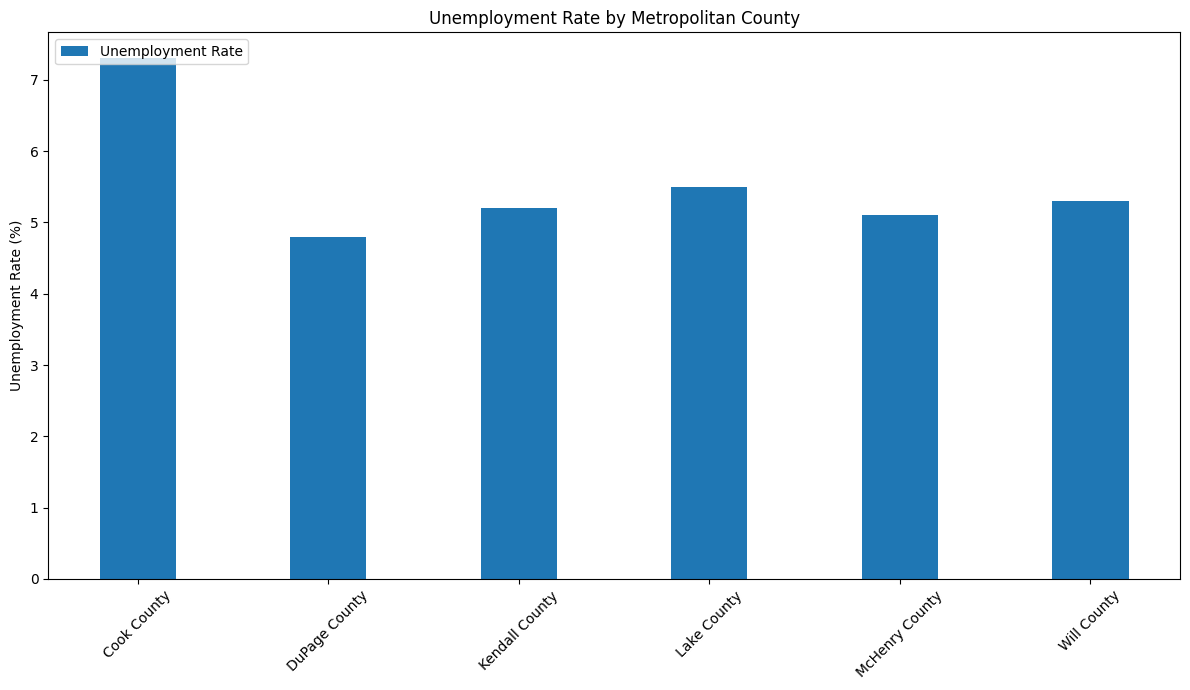

In [179]:
import matplotlib.pyplot as plt
import numpy as np

CHI_metro_counties = ("Cook County", "DuPage County", "Kendall County", "Lake County", "McHenry County", "Will County")
unemployment_rates = (7.3, 4.8, 5.2, 5.5, 5.1, 5.3)

x = np.arange(len(CHI_metro_counties))  # the label locations
width = 0.4  # Adjusted width for the bars since there's only one bar per county now

fig, ax = plt.subplots(figsize=(12, 7))
rects = ax.bar(x, unemployment_rates, width, label='Unemployment Rate')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Unemployment Rate (%)')
ax.set_title('Unemployment Rate by Metropolitan County')
ax.set_xticks(x)
ax.set_xticklabels(CHI_metro_counties)
ax.legend(loc='upper left', ncol=1)

plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout for better appearance
plt.show()


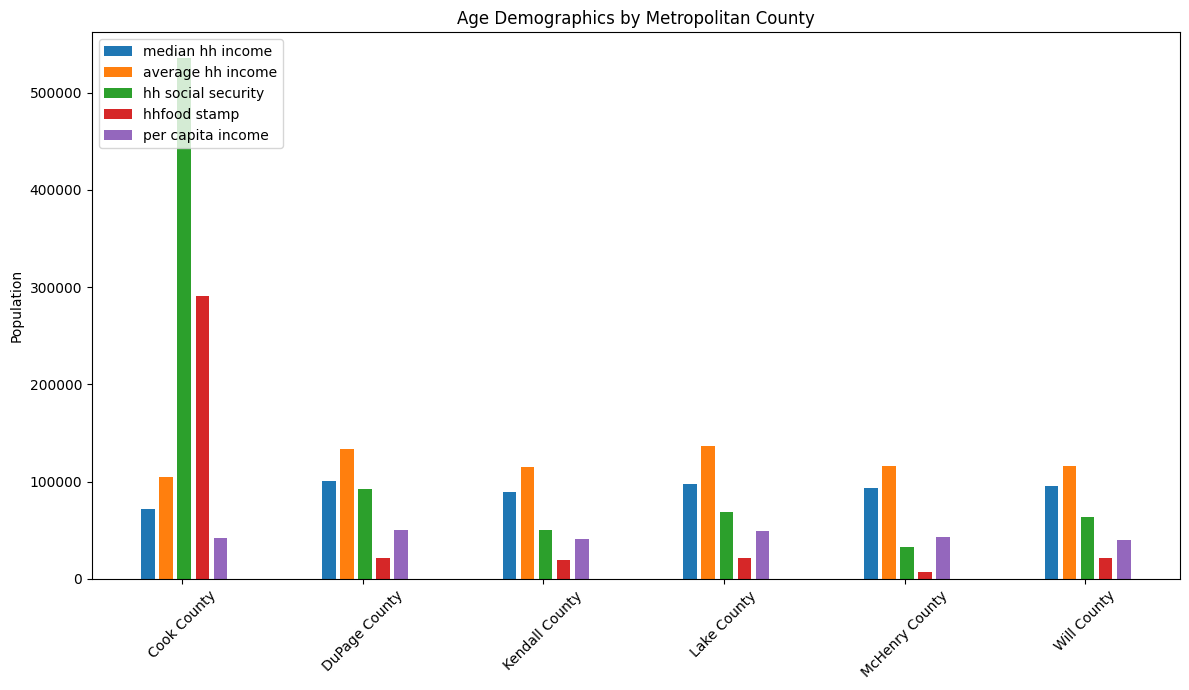

In [180]:
#using age instead of race

import matplotlib.pyplot as plt
import numpy as np

CHI_metro_counties = ("Cook County", "DuPage County", "Kendall County", "Lake County", "McHenry County", "Will County")
population_size = {
    'median hh income ': (72121,100292,88935,97127,93801,95751),
    'average hh income': (104880,133288,115083,136312,115692,116288,),
    'hh social security': (535150,92573,50155,68366,33060,63990,),
    'hhfood stamp':(290776,21700,19063,21215,7136,21134),
    'per capita income':(41706,50344,40661,49440,43047,40493)
}

# Multiply x values by a factor (2 in this case) to spread bars out
x = np.arange(0, 2*len(CHI_metro_counties), 2)  # Modified line

width = 0.15  
space_between_bars = 0.05
multiplier = 0

fig, ax = plt.subplots(figsize=(12, 7))

for attribute, measurement in population_size.items():
    offset = (width + space_between_bars) * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

ax.set_ylabel('Population')
ax.set_title('A Demographics by Metropolitan County')
ax.set_xticks(x + 2.5*width)  # Center the ticks
ax.set_xticklabels(CHI_metro_counties)
ax.legend(loc='upper left', ncol=1)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


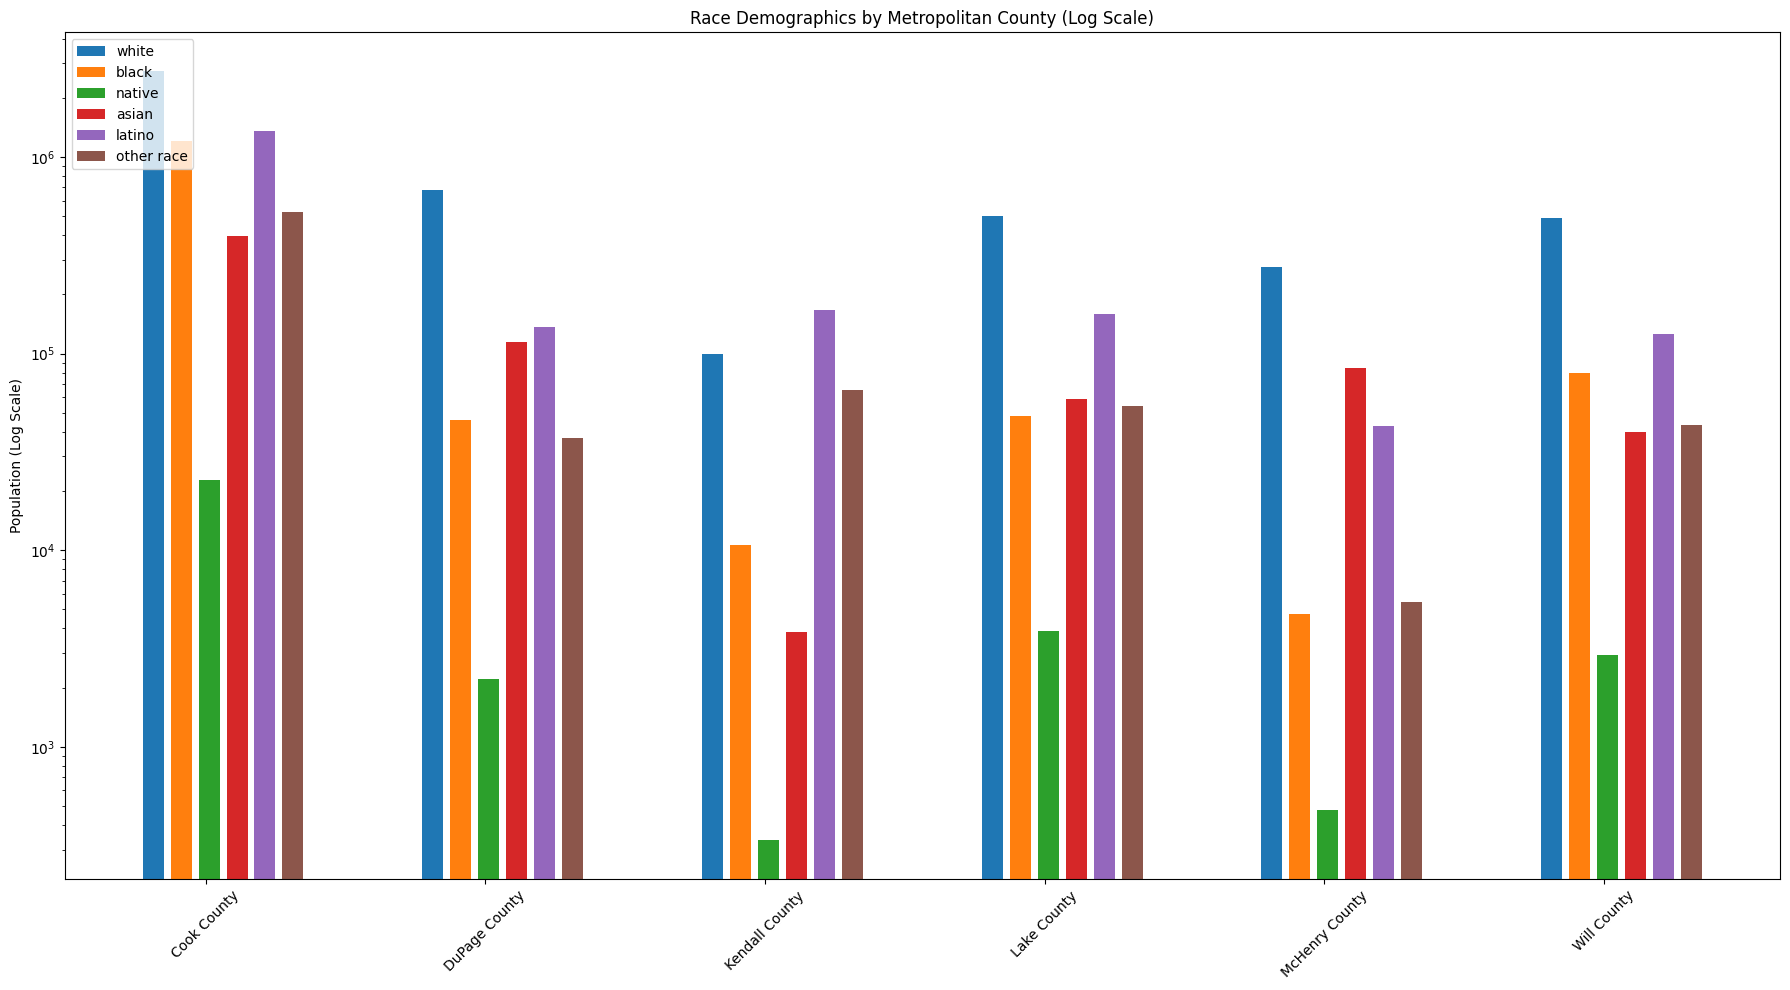

In [185]:
import matplotlib.pyplot as plt
import numpy as np

CHI_metro_counties = ("Cook County", "DuPage County", "Kendall County", "Lake County", "McHenry County", "Will County")
population_size = {
    'white': (2740032, 677738, 99830, 499259, 275551, 487812),
    'black': (1211240, 45922, 10664, 48075, 4737, 79621),
    'native': (22867, 2202, 334, 3887, 476, 2948),
    'asian': (396831, 114491, 3848, 58802, 84404, 39763),
    'latino':(1346949,135909,167111,159640,42981,126302),
    'other race':(523543,37323,64982,53828,5427,43346)
}

# Multiply x values by a factor (2 in this case) to spread bars out
x = np.arange(0, 2*len(CHI_metro_counties), 2)  # Modified line

width = 0.15  
space_between_bars = 0.05
multiplier = 0

fig, ax = plt.subplots(figsize=(18, 10))  # Increased figure size for a more "zoomed out" effect

for attribute, measurement in population_size.items():
    offset = (width + space_between_bars) * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

ax.set_ylabel('Population (Log Scale)')
ax.set_title('Race Demographics by Metropolitan County (Log Scale)')
ax.set_xticks(x + 2.5*width)  # Center the ticks
ax.set_xticklabels(CHI_metro_counties)
ax.legend(loc='upper left', ncol=1)

ax.set_yscale('log')  # Set y-axis to log scale

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


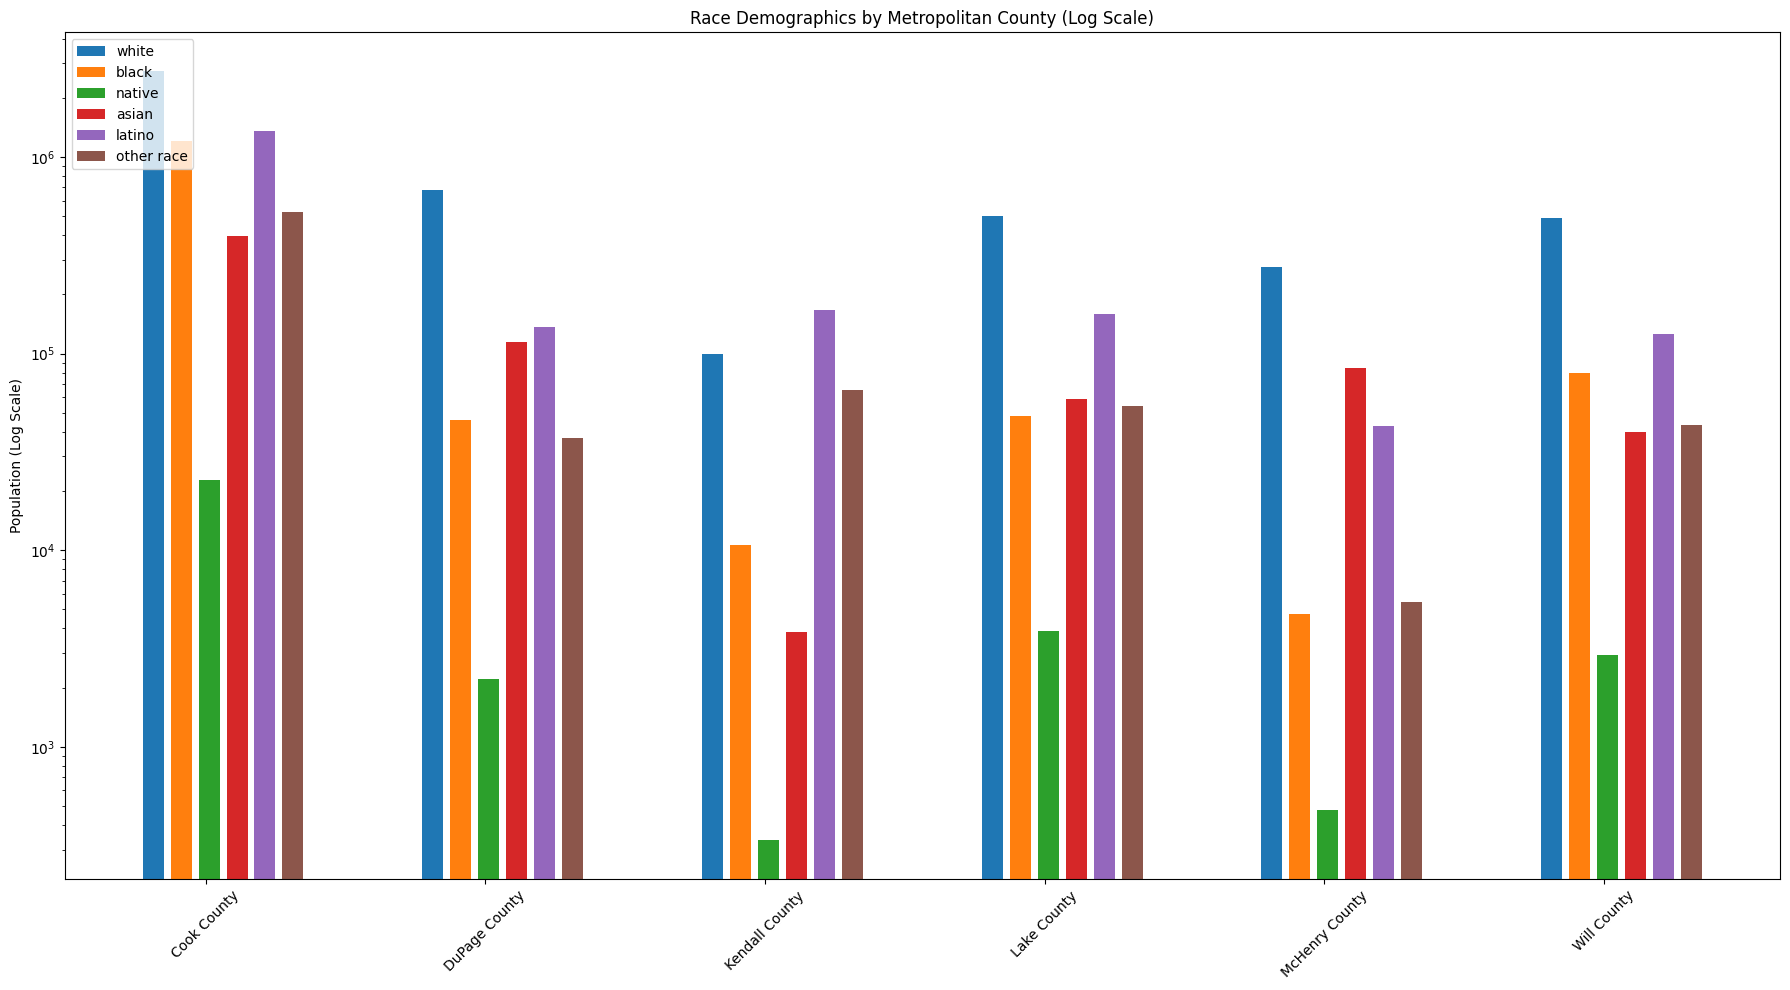

In [186]:
import matplotlib.pyplot as plt
import numpy as np

CHI_metro_counties = ("Cook County", "DuPage County", "Kendall County", "Lake County", "McHenry County", "Will County")
population_size = {
    'white': (2740032, 677738, 99830, 499259, 275551, 487812),
    'black': (1211240, 45922, 10664, 48075, 4737, 79621),
    'native': (22867, 2202, 334, 3887, 476, 2948),
    'asian': (396831, 114491, 3848, 58802, 84404, 39763),
    'latino':(1346949,135909,167111,159640,42981,126302),
    'other race':(523543,37323,64982,53828,5427,43346)
}

# Multiply x values by a factor (2 in this case) to spread bars out
x = np.arange(0, 2*len(CHI_metro_counties), 2)

width = 0.15  
space_between_bars = 0.05
multiplier = 0

fig, ax = plt.subplots(figsize=(18, 10))

for attribute, measurement in population_size.items():
    offset = (width + space_between_bars) * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

ax.set_ylabel('Population (Log Scale)')
ax.set_title('Race Demographics by Metropolitan County (Log Scale)')
ax.set_xticks(x + 2.5*width)  # Center the ticks
ax.set_xticklabels(CHI_metro_counties)
ax.legend(loc='upper left', ncol=1)

ax.set_yscale('log')  # This line sets the y-axis to a log scale

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Age Demographics Census Data Visualizations
**I wasn't able to complete anything in here**

In [117]:
plt.figure(figsize=(10,6)) 

binz = np.arange(23, 37, 5)                            # binz set to increments of 5
plt.hist(x=updated_counties2["under_5_years"], bins = binz)
plt.show()

KeyError: 'under_5_years'

<Figure size 1000x600 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,6)) 

plt.scatter(x= census_and_hhi_IL['census_name'], y= census_and_hhi_IL[''])
plt.show()

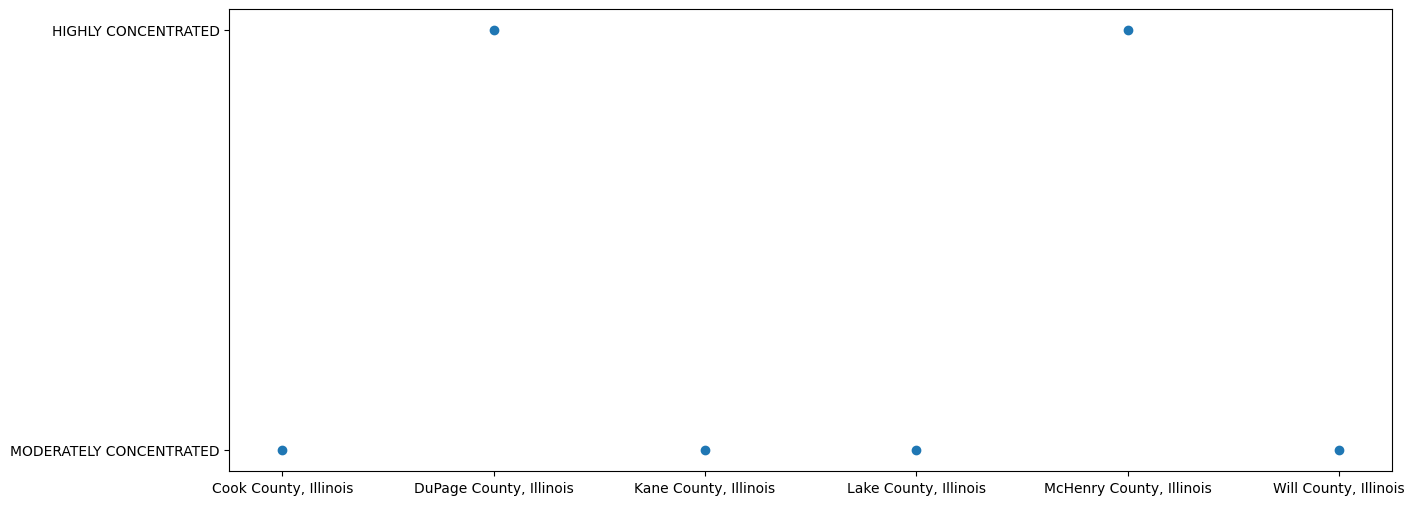

In [196]:
plt.figure(figsize=(15,6)) 

plt.scatter(x= census_and_hhi_IL['census_name'], y= census_and_hhi_IL['MARKET CONCENTRATION'])
plt.show()

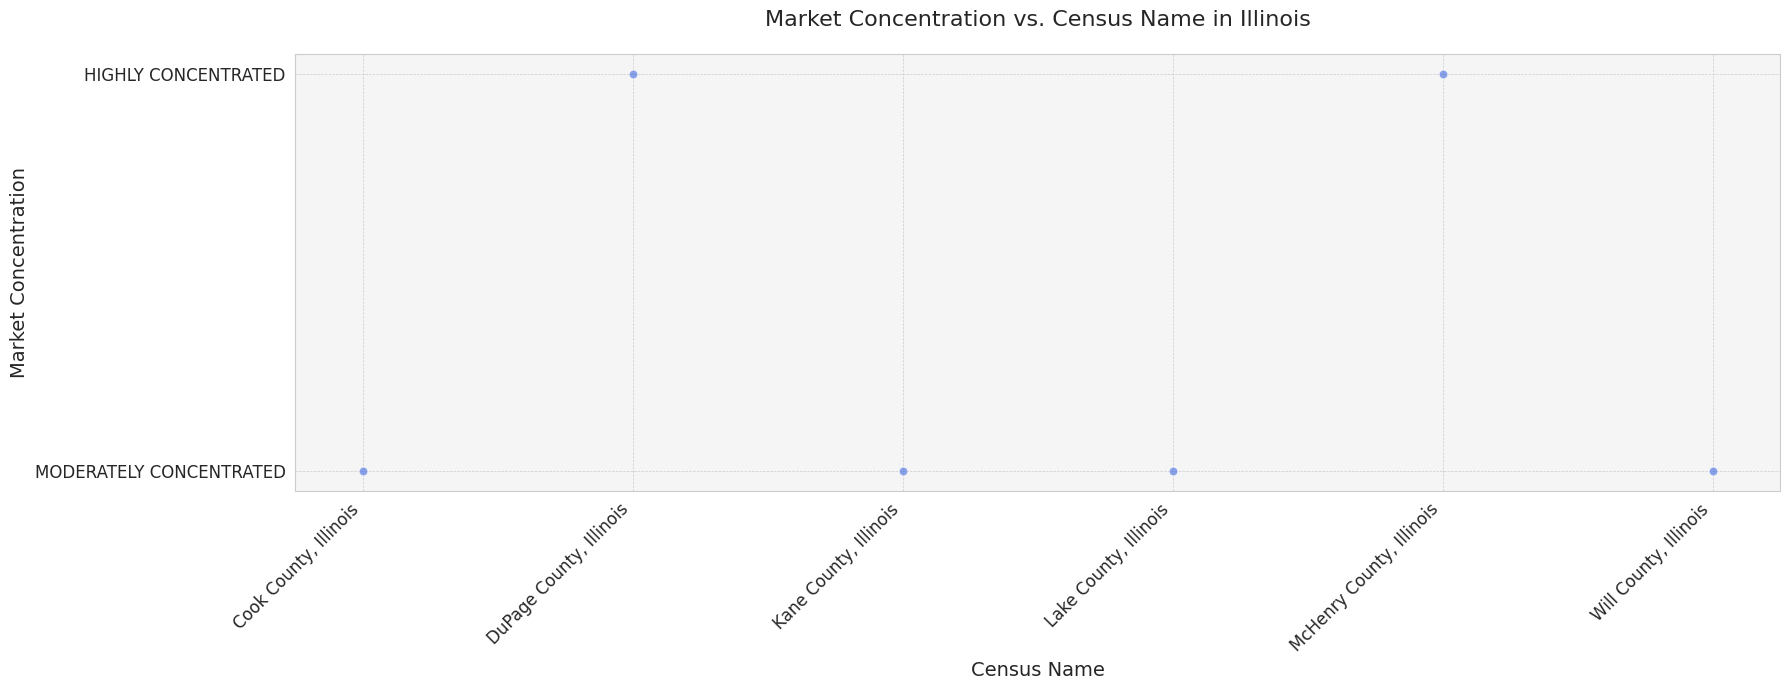

In [199]:
import matplotlib.pyplot as plt

# Figure settings
plt.figure(figsize=(18, 7))

# Plot background and grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().set_facecolor('whitesmoke')

# Scatter plot
plt.scatter(x=census_and_hhi_IL['census_name'], y=census_and_hhi_IL['MARKET CONCENTRATION'], color='royalblue', alpha=0.6, edgecolors='white', linewidth=0.5)

# Title and labels
plt.title('Market Concentration vs. Census Name in Illinois', fontsize=16, pad=20)
plt.xlabel('Census Name', fontsize=14)
plt.ylabel('Market Concentration', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Optimize layout
plt.tight_layout()

# Show the plot
plt.show()


In [187]:
census_and_hhi_IL


,Unnamed: 0,geo_id,census_name,total_population,total_male,total_female,under_5_years,median_age,over_18_years,over_65_years,white,black,native,asian,islander,other_race,more_one_race,latino,num_households_dp2,perc_hh_w_children,avg_household_size,avg_family_size,pop_in_households,pop_in_households_child,pop_enrolled,college_graduates,tot_pop_birth_native,tot_pop_birth_foreign,speaks_english_only,speaks_english_less_very_well,unemployment_rate,work_from_home,median_hh_income_d,average_hh_income_d,hh_social_security,hh_foodstamps_snap,per_capita_income_d,perc_fam_bellow_poverty,perc_ppl_bellow_poverty,state,COUNTY CODE,HHI,MARKET CONCENTRATION,STATE,geometry
0,611,0500000US17031,"Cook County, Illinois",5265398,2570478,2694920,312408,37.3,4113751,774279,2740032,1211240,22867,396831,2068,523543,368817,1346949,2044658.0,28.1,2.53,3.33,5176131.0,1553695.0,1276692.0,1489931.0,4163385.0,1102013.0,3215693.0,673502.0,7.3,287499,72121,104880,535150,290776,41706,9.9,13.5,17,31,2120.543967,MODERATELY CONCENTRATED,IL,None
1,617,0500000US17043,"DuPage County, Illinois",934094,461851,472243,54019,39.7,721393,146886,677738,45922,2202,114491,375,37323,56043,135909,347385.0,32.5,2.65,3.20,921130.0,292539.0,240067.0,325349.0,751394.0,182700.0,630438.0,77913.0,4.8,67401,100292,133288,92573,21700,50344,4.3,6.1,17,43,3076.668896,HIGHLY CONCENTRATED,IL,None
2,640,0500000US17089,"Kane County, Illinois",518648,259680,258968,31939,38.0,387240,71843,356822,27863,3179,20688,379,64982,44735,167111,181263.0,36.8,2.83,3.34,513180.0,170984.0,139520.0,122594.0,430016.0,88632.0,334568.0,55656.0,5.2,28662,88935,115083,50155,19063,40661,6.1,8.4,17,89,2222.092320,MODERATELY CONCENTRATED,IL,None
3,644,0500000US17097,"Lake County, Illinois",714484,358911,355573,39917,38.5,542057,102890,499259,48075,3887,58802,424,53828,50209,159640,252731.0,35.1,2.75,3.28,695686.0,233551.0,191435.0,217451.0,581208.0,133276.0,477010.0,65001.0,5.5,45081,97127,136312,68366,21215,49440,5.2,7.6,17,97,1965.217481,MODERATELY CONCENTRATED,IL,None
4,651,0500000US17111,"McHenry County, Illinois",310749,155410,155339,16737,40.4,237841,46037,275551,4737,476,8440,5,5427,16113,42981,114446.0,34.8,2.70,3.12,308871.0,99397.0,77823.0,74658.0,283400.0,27349.0,253425.0,13138.0,5.1,17853,93801,115692,33060,7136,43047,4.6,6.3,17,111,3782.047105,HIGHLY CONCENTRATED,IL,None
5,694,0500000US17197,"Will County, Illinois",696403,347369,349034,39619,38.3,523977,91810,487812,79621,2948,39763,140,43346,42773,126302,237043.0,37.6,2.90,3.39,687576.0,238398.0,184424.0,162906.0,610361.0,86042.0,521895.0,48966.0,5.2,32857,95751,116288,63990,21134,40493,5.0,6.8,17,197,2336.286078,MODERATELY CONCENTRATED,IL,None


In [118]:
plt.figure(figsize=(7,5)) 

binz = np.arange(23, 37, 2)
plt.hist(x=updated_counties2["under_5_years"], bins = binz)
plt.xlabel('Age')                                   # x-label added
plt.ylabel('Count')                                         # y-label added
plt.title('Age Distribution of population per metro county')                    # title added
plt.show()

KeyError: 'under_5_years'

<Figure size 700x500 with 0 Axes>

In [184]:
import matplotlib.pyplot as plt
import numpy as np

CHI_metro_counties = ("Cook County", "DuPage County", "Kendall County", "Lake County", "McHenry County", "Will County")
population_size = {
    'unemployment rate': (7.3,4.8,5.2,5.5,5.1,5.3),


x = np.arange(len(CHI_metro_counties))  # the label locations
width = 0.15  # Slightly reduced width for the bars
space_between_bars = 0.05
multiplier = 0

fig, ax = plt.subplots(figsize=(12, 7))

for attribute, measurement in population_size.items():
    offset = (width + space_between_bars) * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Population')
ax.set_title('Race Demographics by Metropolitan County')
ax.set_xticks(x + 2.5*width)  # Adjust the centering of the ticks
ax.set_xticklabels(CHI_metro_counties)
ax.legend(loc='upper left', ncol=1)

plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout for better appearance
plt.show()


SyntaxError: invalid syntax (124749131.py, line 9)

# Demographics against HHI
**work on the Visualizations & the 2 yaxis scatter plot**  
**merge the CENSUS data with the HHI index information**

In [119]:
#Read in the data and keep only US Continental States and DC
stores_general = pd.read_csv('/srv/data/my_shared_data_folder/rafi/2022_Business_Academic_QCQ_grocery.csv')
stores_general.drop(['Unnamed: 0'],inplace=True,axis=1)
territories = ['PR', 'FM', 'MP', 'GU', 'VI', 'MH','AK','HI']
stores_general = stores_general.drop(stores_general[stores_general['STATE'].isin(territories)].index)
stores_general.head(3)

,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE
0,GOMART,55 POSTAL PLZ,MORGANTOWN,WV,26508,7005.0,61.0,304,2,C,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,554110.0,ALTERNATIVE FUELS,NaN,NaN,NaN,NaN,NaN,NaN,2022,21303.0,13.0,2482.0,2,NaN,NaN,NaN,NaN,998372387,NaN,124929449.0,50.0,389500.0,E,I,998372387.0,NaN,7,11000.0,3.0,39.594376,-79.954437,P,34060.0,2.0,390.0,54061.0
1,7-ELEVEN,485 E MAIN ST,EL CENTRO,CA,92243,2619.0,25.0,760,2,B,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,6.0,1273.0,2,W,NaN,NaN,NaN,495660326,NaN,5863311.0,800.0,1272634.0,H,K,495660326.0,NaN,7,11400.0,3.0,32.792679,-115.536058,0,20940.0,2.0,0.0,6025.0
2,EL SOL MARKET,110 W MAIN ST,WESTMORLAND,CA,92281,NaN,25.0,760,2,B,C,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,5.0,1061.0,9,NaN,NaN,NaN,NaN,519605455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,10200.0,1.0,33.051800,-115.581800,X,20940.0,2.0,0.0,6025.0


In [120]:
#Create lists of Supermarkets/Companies owned by the Parent Coporations of Interest (Supermarkets/Companies were taken from Wikipedia)
#Ahold Delhaize owned supermarkets/companies
ahold = ["Bottom Dollar Food",
    "Food Lion",
    "FreshDirect",
    "Giant",
    "Giant Food",
    "Hannaford",
    "Stop & Shop",
    "Peapod",
    "Bfresh",
    "Eastside Marketplace",]
#WALMART owned supermarkets/companies
walmart = ["WALMART","SAM'S CLUB"]
#Krogers owned supermarkets/companies
kroger = ["Baker's",
    "City Market",
    "Dillons",
    "Food 4 Less",
    "Foods Co.",
    "Fred Meyer",
    "Fry's",
    "Gerbes",
    "Harris Teeter",
    "JayC",
    "King Soopers",
    "Kroger",
    "Mariano's",
    "Metro Market",
    "Pay Less",
    "Pick 'n Save",
    "QFC",
    "Ralphs",
    "Ruler Foods",
    "Smith's",]
# Albertsons owned supermarkets/companies
albertsons= ["Acme Markets",
    "Albertsons",
    "Albertsons Market",
    "Amigos",
    "Andronico's",
    "Balducci's",
    "Carrs",
    "Haggen",
    "Jewel-Osco",
    "Kings Food Markets",
    "Lucky",
    "Market Street",
    "Pak 'n Save",
    "Pavilions",
    "Randalls",
    "Safewa",
    "Shaw's",
    "Star Market",
    "Tom Thumb",
    "United Supermarkets",
    "Vons",
    "Buttrey Food and Drug",
    "Max Food and Drug",
    "Max Foods",
    "Skagg's Albertsons",
    "Super Saver",]
#Costco owned supermarkets/companies
costco = ["Costco"]

In [121]:
#Generated String Matches from above
#String matched brands owned by Walmart:
walmart_string = ['WALMART GROCERY PICKUP', 'WALMART GROCERY PKUP-DELIVERY', "SAM'S CLUB DELI"]
#Doesn't appear to have Walmart Neighborhood Stores
#String matched brands owned by Ahold Delhaize:
ahold_string = ['BOTTOM DOLLAR', 'DOLLAR DOLLAR', 'FOOD', 'FOOD 4 LESS', 'FOOD LION', 'FRESH DIRECT', 'REC', 'FRESH', 'H & H', 'S & S', 'FRESHII', 'GIANT', 'GIANT EAGLE', 'GIANT EAGLE FLORAL', 'GIANT FOOD', 'HANNAFORD', 'STOP & SHOP', 'PEA POD', 'BFRESH MARKET', 'REFRESH', 'EASTSIDE MARKETPLACE', 'WESTSIDE MARKETPLACE', 'MARKET', 'E MARKET', 'MARKETPLACE']
#String matched brands owned by Kroger:
kroger_string = ["BAKER'S", 'S & S', 'BAKERS', "BAKER'S GAS & WELD SUPLS INC", "BAKER'S GAS", "BAKER'S MARKET", "BAKER'S PRO FARM LLC", 'BAKER STREET MARKET', "BAKER'S KWIK SHOP", 'CITY MARKET', 'DILLONS', 'FOOD 4 LESS', 'FOODS CO', 'FRED MEYER', "FRY'S FOOD", 'GERBES SUPER MARKET', 'GERBES SUPER MARKETS', 'GE', 'GERBES SUPERMARKET', 'HARRIS TEETER', 'JAYC', "JAYCEE'S", 'JAYCON', 'CITY-RALEIGH-JAYCEE PARK-CMNTY', 'JAYCE MINIMARKET', 'NAY & JAY', 'KING SOOPERS', 'KROGER', "MARIANO'S", 'METRO MARKET', 'METRO MINI MARKET', 'MARKET MARKET', 'PAY LESS LIQUORS', 'PAY LESS SUPER MARKETS', 'PAY LESS GAS & FOOD', 'PAY LESS IGA', 'FOOD FOR LESS', 'FAR LESS FOOD MARKET', 'MORE FOR LESS', 'PRICE LESS FOODS', 'COST LESS FOODS CO', "PICK'N SAVE", 'QFC', 'RALPHS', 'RULER FOODS', "SMITH'S"]
#String matched brands owned by Costco
costco_string = ["COSTCO DELI"]
#String matched brands owned by Albertsons
albertsons_string = ['ACME MARKETS', 'ALBERTSONS', 'ALBERTSONS MARKET', 'MARKET MARKET', 'MARKET', '2 AMIGOS', 'AMIGO', 'LOS AMIGOS DISTRIBUTING', 'DOS AMIGOS MARKET', '3 AMIGOS BEER WINE-FOOD STORE', 'THREE AMIGOS', 'AMIGOS FOOD MART', 'LOS AMIGOS', 'AMIGOS MKT LOS', 'AMIGOS MARKET 7', 'TIENDA LOS AMIGOS', 'AMIGOS CONVENIENCE STORE', 'LOS AMIGOS UNO', 'AMIGOS LATIN GROCERY', 'AMIGOS UNITED', 'AMIGOS FOOD MART LLC', 'LOS AMIGOS MARKET', 'LOS AMIGOS SUPERMARKET', 'ICO', "ANDRONICO'S COMMUNITY MARKETS", "KRAUSZER'S FOOD STORE", "CASEY'S", "MR T'S", "SEVEN'S", "PATTY'S PANTRY & DELI", "CASHION'S QUIK STOP", 'E C F S SNACKS LLC', "MICKEY'S T-MART INC", "STATLER'S COUNTRY MART", "MIKE'S CONVENIENCE", "BELL'S ROWLESBURG GROCERY", "SOCCORSI'S GROCERY & SUBS", 'CC', "BALDUCCI'S FOOD LOVER'S MARKET", "DANIEL'S MARKET", "GRILLO'S MARKET", 'S & G CONVENIENCE MART', "NANCY'S FOODMART", "MILLER'S MARKETS", "MAYNARD'S OF FLANDREAU", "SKIP'S", "HARDESTY'S EXPRESS MART LLC", "KASSAR'S FOOD & GIFTS", "JERRY'S MARKET & LIQUOR", "SHELLY'S GROCERY & BAKERY LLC", 'CARRS/SAFEWAY', 'CARRS SAFEWAY', 'CARRS QUALITY CTR PALMER SHPG', 'BIG CHEAP CASH & CARR', 'C & B USED CARS', 'HAGGEN', 'HAGGEN FOOD & PHARMACY', 'HAGGEN SUPPORT CTR', 'HAGGEN FOOD', 'GE', 'JEWEL-OSCO', 'KINGS FOOD MARKETS', 'KINGS FOOD MARKET', "KING'S FOOD MARKET", "KING'S FOODMARKET", 'KINGS FOOD MART', 'FOOD', 'LUCKY', 'LUCKY 3', 'LUCKY 7', "LUCKY'S", 'LUCKY 8', 'LUCKYS', 'LUCKY SEVEN FOOD STORE', 'LUCKY FOOD FARMERS MARKET', 'LUCKY GROCERY & DELI', 'LUCKY DOLLAR', 'LUCKY CHARM CONVENIENCE STORE', 'LUCKY STAR MARKET LLC', 'LUCKY FOOD MART LLC', 'LUCKY MARKET', "LUCKY'S STATION", 'LUCKY MARKET LLC', "LUCKY'S SUPER MARKET", 'MARKET STREET', "PAK 'N SAVE", 'U-SAVE FOOD STORE', 'GOLD LINE GRAB N GO', 'INDO PAK SUPERMARKET', 'STOP N GO FOOD MART', 'STOP N GO ENTERPRISES INC', "OCALA SHOP N' PLAY LLC", 'J & N MINI MART 2', "GRAB 'N GO MART LLC", 'KWIK PAK FOOD MART', "SHOP 'N SAVE EXPRESS", 'PIC-N-SAVE MARKET', 'U-SAVE TRAVEL PLAZA', "UP NORT' SWEET N SAVORY", 'STOP N SHOP WESTFIELD', "SACK 'N SAVE FOOD", "STOP 'N GO MARKETS OF TEXAS", 'CARTA N SHORE GARAGE', 'MASALA INDO PAK GROCERS', 'IN N OUT FOOD & GAS LLC', "GAS 'N' GO FOOD & BEVERAGE", 'N A M C COMMUNITY MARKET INC', 'PAVILIONS', 'RANDALLS', 'SAFEWAY', 'S & S', "SHAW'S SUPERMARKET", "SHAW'S SUPERMARKETS INC", 'STAR MARKET', 'TOM THUMB', 'UNITED SUPERMARKETS', 'VONS', 'FOOD 4 LESS', 'FOOD MART', 'FOOD LION', 'HERA FOOD MART', 'FOOD TOWN', 'FOOD FAIR', 'OHM FOOD MART', "D'S FOOD STORE", 'FOOD EXPRESS', 'E Z FOOD MART', 'JR FOOD MART', 'EXPRESS FOOD', 'MR FOOD MART', 'CITGO CONVENIENT FOOD MART', 'GREEN ACRES HEALTH FOOD STORE', 'FRIENDSHIP FOOD STORES INC', 'VERISTAS AFRICAN FOOD STORE', 'ILLINOIS VALLEY FOOD & DELI', "FRY'S FOOD", 'FOOD CITY', 'MAX FOODS', 'MAXI FOODS', 'FOODS', 'FOOD MAX', 'SUPER ONE FOODS', 'SUNSHINE FOODS', 'JAMBOREE FOODS', 'DAY STAR FOODS', "SULLIVAN'S FOODS", 'AFFILIATED FOODS CO-OP', "JENSEN'S FINEST FOODS", 'EAST DAKOTAH NATURAL FOODS', "JENSEN'S FOODS", 'RITE PRICE FOODS', 'VALLEY CENTER FOODS', 'SUPER SAVER', 'SUPER SAVE', 'SUPER SAVER INC', 'SUPER', 'SUPER SAVER COST PLUS', "SAAR'S SUPER SAVER FOODS"]

In [122]:
kroger_clean = ["BAKER'S",
 'BAKERS',
 'CITY MARKET',
 'DILLONS',
 'FOOD 4 LESS',
 'FOODS CO',
 'FRED MEYER',
 "FRY'S FOOD",
 'GERBES SUPER MARKET',
 'GERBES SUPER MARKETS',
 'GERBES SUPERMARKET',
 'HARRIS TEETER',
 'JAYC',
 'KING SOOPERS',
 'KROGER',
 "MARIANO'S",
 'METRO MARKET',
 'PAY LESS SUPER MARKETS',
 "PICK'N SAVE",
 'QFC',
 'RALPHS',
 'RULER FOODS',
 "SMITH'S","KROGER PICK UP"]
#Ahold Delhaize FINAL:
ahold_clean = [ 'FOOD LION',
 'GIANT',
 'GIANT EAGLE',
 'GIANT FOOD',
 'HANNAFORD',
 'STOP & SHOP',
 'BFRESH MARKET',
 'EASTSIDE MARKETPLACE','STOP & SHOP SUPERMARKET']
#WALMART FINAL:
walmart_clean = ['WALMART GROCERY PICKUP',
 'WALMART GROCERY PKUP-DELIVERY',
 "SAM'S CLUB DELI"]
#COSTCO FINAL:
costco_clean = ["COSTCO DELI"]
#ALBERTSONS FINAL:
albertsons_clean = ['ACME MARKETS',
'ALBERTSONS',
'ALBERTSONS MARKET',
'AMIGOS UNITED',
"ANDRONICO'S COMMUNITY MARKETS",
'CARRS/SAFEWAY',
'CARRS SAFEWAY',
'HAGGEN',
'HAGGEN FOOD & PHARMACY',
'HAGGEN FOOD',
'JEWEL-OSCO',
'KINGS FOOD MARKETS',
'KINGS FOOD MARKET',
'MARKET STREET',
"PAK 'N SAVE",
'PAVILIONS',
'RANDALLS',
'SAFEWAY',
'STAR MARKET',
'TOM THUMB',
'UNITED SUPERMARKETS',
'VONS',
'SUPER SAVER',
'CARRS QUALITY CTR PALMER SHPG',
 "SAAR'S SUPER SAVER FOODS"]

In [123]:
kroger_removed = [value for value in kroger_string if value not in kroger_clean]
ahold_removed = [value for value in ahold_string if value not in ahold_clean]
walmart_removed = [value for value in walmart_string if value not in walmart_clean]
costco_removed = [value for value in costco_string if value not in costco_clean]
albertsons_removed = [value for value in albertsons_string if value not in albertsons_string]

In [124]:
def parent_name(row):
    '''Creates a new column called "PARENT NAME" based on the cleaned string match list'''
    '''The new column generalizes individual companies into their parent coporation (ie. Walmart, Krogers, etc.)'''
    companies = row['COMPANY']
    if companies in walmart_clean:
        return 'WALMART'
    if companies in costco_clean:
        return 'COSTCO'
    if companies in ahold_clean:
        return 'AHOLD DELHAIZE'
    if companies in kroger_clean:
        return 'KROGER'
    if companies in albertsons_clean:
        return 'ALBERTSONS'
    else:
        return 'OTHER'
stores_general['STORE TYPE'] = stores_general.apply(parent_name, axis=1)

In [125]:
#Locate the unique primary sic codes present within the supermarkets/companies owned by the parent corporations of interest
#These unique primary SIC codes will be used as the basis of how we filter the main dataset to include only relevant supermarkets/companies (ie. removing convenient stores)
#Step 1: Filter a dataframe based on parent coporations
parent_companies = ['WALMART', 'COSTCO', 'KROGER', 'AHOLD DELHAIZE','ALBERTSONS']
filtered_df = stores_general[stores_general['STORE TYPE'].isin(parent_companies)]
# Step 2: Extract the PRIMARY SIC CODES values
primary_sic_codes = filtered_df['PRIMARY SIC CODE']
# Step 3: Get the unique PRIMARY SIC CODES values
unique_sic_codes = primary_sic_codes.unique()
# Print the unique PRIMARY SIC CODES
unique_sic_codes = np.delete(unique_sic_codes,(np.where(unique_sic_codes == 541103)))
#***NOTE remove SIC Code 541103 since it contains the SIC code for convenient stores

In [126]:
def sic_filter(df):
    """
    Filters the dataframe to keep only the stores with specific primary SIC codes,
    including NaN values. SIC codes are from the parent corporation's subsidiary's Primary SIC codes
    The function takes in an unfiltered dataframe as a parameter.
    The function returns a filtered dataframe.
    """
    sic_codes = unique_sic_codes
    filtered_df = df[df['PRIMARY SIC CODE'].isin(sic_codes) | df['PRIMARY SIC CODE'].isna()]
    return filtered_df
supermarkets = sic_filter(stores_general)

In [127]:
def update_parent_name(df):
    """
    Helps account for erros in manual string matching selection
    Checked for different Parent Numbers within each Parent Group and if the company had a different Parent Number
    than the accepted, the company was grouped to other
    """
    accepted_parent_numbers = {
        238136725.0: "AHOLD DELHAIZE",
        5995907.0: "ALBERTSONS",
        7521503.0: "KROGER",
        5889993.0: "WALMART",
        441311800.0: "COSTCO"
    }
    for parent_number, parent_name in accepted_parent_numbers.items():
        df.loc[(df["PARENT NUMBER"] != parent_number) & (df["STORE TYPE"] == parent_name), "STORE TYPE"] = "OTHER"
    return df
supermarkets = update_parent_name(supermarkets)
#Assigns Parent Number of Albertsons to CARRS
supermarkets.loc[supermarkets[supermarkets["COMPANY"] == "CARRS QUALITY CTR PALMER SHPG"].index, "PARENT NUMBER"] = 5995907.0

In [128]:
def process_dataframe(df):
    """
    Process the dataframe by generating parent numbers for companies.
    Generates a random parent number from 0-9999 if the original parent number was NaN.
    If the same company appears with a parent number of NaN, it doesn't get a new parent number; it gets the same parent number as its counterpart.
    LIMITATIONS: This function does not account for when two different corporations have companies with the same name;
    it will ultimately group companies with the same name into one parent number even if they are actually different organizations.
    This type of anomaly is infrequent, so we will overlook this issue.
    """
    companies = {}
    def process_row(row):
        company = row["COMPANY"]
        parent_number = row["PARENT NUMBER"]
        if pd.isna(parent_number):
            if company in companies:
                existing_parent = companies[company]
                if not pd.isna(existing_parent):
                    row["PARENT NUMBER"] = existing_parent
            else:
                new_parent_number = random.randrange(0, 9999)
                companies[company] = new_parent_number
                row["PARENT NUMBER"] = new_parent_number
        else:
            companies[company] = parent_number
        return row
    df_na = df.loc[df["PARENT NUMBER"].isna()]
    company_list = df_na["COMPANY"].unique().tolist()
    df = df.apply(process_row, axis=1)
    return df
supermarkets = process_dataframe(supermarkets)

In [69]:
non_parent_group = supermarkets[supermarkets["PARENT NUMBER"] < 9999].groupby("FIPS CODE")["SALES VOLUME (9) - LOCATION"].median().reset_index()
independent_non_parent = non_parent_group[non_parent_group["SALES VOLUME (9) - LOCATION"] < 4]
non_par = non_parent_group[non_parent_group["SALES VOLUME (9) - LOCATION"] > 3]
non_parent = supermarkets[supermarkets["FIPS CODE"].isin(non_par["FIPS CODE"])]
np_independent = supermarkets[supermarkets["FIPS CODE"].isin(independent_non_parent["FIPS CODE"])]
# Calculate FIPS CODE-specific medians
median_np = non_parent.groupby("FIPS CODE")["SALES VOLUME (9) - LOCATION"].median().reset_index()
median_np_ind = np_independent.groupby("FIPS CODE")["SALES VOLUME (9) - LOCATION"].median().reset_index()
# Locate Companies with a designated parent number (indicated by a parent number of > 9999)
# Split these companies arbitrarily to account for true independent stores and non-independent stores (if there are only 3 companies under the parent number it is classified as independent other)
parent_group = supermarkets[supermarkets["PARENT NUMBER"] > 9999].groupby("FIPS CODE")["SALES VOLUME (9) - LOCATION"].median().reset_index()
independent_parent = parent_group[parent_group["SALES VOLUME (9) - LOCATION"] < 4]
p = parent_group[parent_group["SALES VOLUME (9) - LOCATION"] > 3]
parent = supermarkets[supermarkets["FIPS CODE"].isin(parent_group["FIPS CODE"])]
independent_parent = supermarkets[supermarkets["FIPS CODE"].isin(independent_parent["FIPS CODE"])]
# Calculate FIPS CODE-specific medians
median_np = non_parent.groupby("FIPS CODE")["SALES VOLUME (9) - LOCATION"].median().reset_index()
median_np_ind = np_independent.groupby("FIPS CODE")["SALES VOLUME (9) - LOCATION"].median().reset_index()
median_parent = parent.groupby("FIPS CODE")["SALES VOLUME (9) - LOCATION"].median().reset_index()
median_parent_ind = independent_parent.groupby("FIPS CODE")["SALES VOLUME (9) - LOCATION"].median().reset_index()
# Update missing values based on FIPS CODE-specific medians
supermarkets = supermarkets.merge(median_np, on="FIPS CODE", suffixes=("", "_median_np"), how="left")
supermarkets.loc[supermarkets["SALES VOLUME (9) - LOCATION"].isnull(), "SALES VOLUME (9) - LOCATION"] = supermarkets["SALES VOLUME (9) - LOCATION_median_np"]
supermarkets = supermarkets.merge(median_np_ind, on="FIPS CODE", suffixes=("", "_median_np_ind"), how="left")
supermarkets.loc[supermarkets["SALES VOLUME (9) - LOCATION"].isnull(), "SALES VOLUME (9) - LOCATION"] = supermarkets["SALES VOLUME (9) - LOCATION_median_np_ind"]
supermarkets = supermarkets.merge(median_parent, on="FIPS CODE", suffixes=("", "_median_parent"), how="left")
supermarkets.loc[supermarkets["SALES VOLUME (9) - LOCATION"].isnull(), "SALES VOLUME (9) - LOCATION"] = supermarkets["SALES VOLUME (9) - LOCATION_median_parent"]
supermarkets = supermarkets.merge(median_parent_ind, on="FIPS CODE", suffixes=("", "_median_parent_ind"), how="left")
supermarkets.loc[supermarkets["SALES VOLUME (9) - LOCATION"].isnull(), "SALES VOLUME (9) - LOCATION"] = supermarkets["SALES VOLUME (9) - LOCATION_median_parent_ind"]
# Drop redundant columns
supermarkets.drop(["SALES VOLUME (9) - LOCATION_median_np", "SALES VOLUME (9) - LOCATION_median_np_ind", "SALES VOLUME (9) - LOCATION_median_parent", "SALES VOLUME (9) - LOCATION_median_parent_ind"], axis=1, inplace=True)

In [129]:
#Finds the Percent of Brick and Mortar and Store Count for Each Major Parent Company and Other
store_count_us = supermarkets.groupby('STORE TYPE').count()[["CITY"]].reset_index().rename(columns={"CITY":"STORE COUNT"})
store_count_us['Percent'] = store_count_us['STORE COUNT'] / supermarkets.shape[0] * 100
store_count_us







,STORE TYPE,STORE COUNT,Percent
0,AHOLD DELHAIZE,1713,2.198691
1,ALBERTSONS,2145,2.753177
2,COSTCO,29,0.037222
3,KROGER,2729,3.502760
4,OTHER,67599,86.765499
5,WALMART,3695,4.742652


In [130]:
import numpy as np
def calculate_market_share(df):
    """
    Calculate market share based on the input dataframe.
    Total Market Volume is calculated by the summation of each companies total sales volume by location
    """
    market_share = df.groupby('COMPANY')[["SALES VOLUME (9) - LOCATION"]].sum().reset_index().rename(columns={"SALES VOLUME (9) - LOCATION": "TOTAL SALES"})
    market_share["PERCENT"] = (market_share["TOTAL SALES"] / market_share["TOTAL SALES"].sum()) * 100
    market_share_sorted = market_share.sort_values(by=["PERCENT"], ascending=False)
    return market_share_sorted
def hhi(num):
    """
    Calculates the HHI of the market
    NOTES:
    """
    return np.square(num).sum()
def categorize_market_concentration(hhi_value):
    """
    Categorizations are based on the Antitrust Division of the US DOJ
    """
    if hhi_value >= 2500:
        return 'HIGHLY CONCENTRATED'
    elif 1500 <= hhi_value < 2500:
        return 'MODERATELY CONCENTRATED'
    else:
        return 'NOT CONCENTRATED'

In [131]:
#Generates new dataframe of STATE and HHI index for the state
states = stores_general["STATE"].unique().tolist()
hhi_values = []
for state in states:
    df_state = supermarkets.loc[supermarkets["STATE"] == state]
    df_state = process_dataframe(df_state)
    market_share_state = calculate_market_share(df_state)
    hhi_value = hhi(market_share_state["PERCENT"])
    market_concentration = categorize_market_concentration(hhi_value)
    hhi_values.append((state, hhi_value, market_concentration))
hhi_df_2022 = pd.DataFrame(hhi_values, columns=["STATE", "HHI", "MARKET CONCENTRATION"])
hhi_df_2022.head(2)

,STATE,HHI,MARKET CONCENTRATION
0,WV,1027.662793,NOT CONCENTRATED
1,CA,350.479384,NOT CONCENTRATED


In [132]:
def calculate_state_hhi(df, state):
    """
    Calculates the HHI on the state level based on county code
    """
    df_state = df.loc[df["STATE"] == state]
    state_counties = df_state["COUNTY CODE"].unique().tolist()
    hhi_values_state = []
    for county in state_counties:
        df_county = df_state.loc[df_state["COUNTY CODE"] == county]
        market_share_county = calculate_market_share(df_county)
        hhi_value_county = hhi(market_share_county["PERCENT"])
        market_concentration_county = categorize_market_concentration(hhi_value_county)
        hhi_values_state.append((county, hhi_value_county, market_concentration_county))
    state_hhi_df = pd.DataFrame(hhi_values_state, columns=["COUNTY CODE", "HHI", "MARKET CONCENTRATION"])
    state_hhi_df["STATE"] = state
    return state_hhi_df

In [133]:
county_hhi = pd.DataFrame(columns=["COUNTY CODE", "HHI", "MARKET CONCENTRATION", "STATE"])
for state in states:
    df_state = supermarkets.loc[supermarkets["STATE"] == state]
    state_hhi = calculate_state_hhi(df_state, state)
    county_hhi = pd.concat([county_hhi, state_hhi], ignore_index=True)
return county_hhi

county_hhi

SyntaxError: 'return' outside function (1861116912.py, line 6)

In [60]:
state_hhi

,COUNTY CODE,HHI,MARKET CONCENTRATION,STATE
0,31.0,2890.990604,HIGHLY CONCENTRATED,ME
1,5.0,2047.964112,MODERATELY CONCENTRATED,ME
2,17.0,4229.416389,HIGHLY CONCENTRATED,ME
3,23.0,4109.130910,HIGHLY CONCENTRATED,ME
4,19.0,4180.225642,HIGHLY CONCENTRATED,ME
5,9.0,2418.318204,MODERATELY CONCENTRATED,ME
6,1.0,3567.646216,HIGHLY CONCENTRATED,ME
7,11.0,2944.855299,HIGHLY CONCENTRATED,ME
8,29.0,1237.716737,NOT CONCENTRATED,ME
9,15.0,2629.340371,HIGHLY CONCENTRATED,ME


In [ ]:
il_counties =county_hhi[county_hhi['STATE'] == 'IL']
desired_counties = [31.0, 43.0, 97.0,197.0,89.0,111.0]  # Example county codes
filtered_IL_hhi = il_counties[il_counties['COUNTY CODE'].isin(desired_counties)]
filtered_IL_hhi
#this is only the metropolitican areas of chicago 

In [ ]:
county_hhi

In [151]:
ILL = ill.rename(columns={'state': 'STATE'})
ILL

,under_5_years,over_18_years,over_65_years
0,312408,4113751,774279
1,54019,721393,146886
2,31939,387240,71843
3,39917,542057,102890
4,16737,237841,46037
5,39619,523977,91810


In [164]:
updated_counties2.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,census_name
11,Illinois,091,00424247,0500000US17091,17091,Kankakee,06,1752121058,12440760,"POLYGON ((-88.25150 41.11422, -88.24089 41.114...","Kankakee County, Illinois"
12,Illinois,187,01785134,0500000US17187,17187,Warren,06,1404747944,1674135,"POLYGON ((-90.78965 40.63685, -90.78956 40.642...","Warren County, Illinois"
13,Illinois,197,01785190,0500000US17197,17197,Will,06,2164927644,34548925,"POLYGON ((-88.26127 41.72466, -88.25477 41.724...","Will County, Illinois"
288,Illinois,027,00424215,0500000US17027,17027,Clinton,06,1227664369,75635324,"POLYGON ((-89.70695 38.65503, -89.68784 38.655...","Clinton County, Illinois"
289,Illinois,031,01784766,0500000US17031,17031,Cook,06,2447370818,1786313044,"POLYGON ((-88.26364 42.06687, -88.25835 42.066...","Cook County, Illinois"


In [136]:
updated_counties2.head(2)
updated_counties3 = updated_counties2.rename(columns={'STATEFP': 'STATE'})
updated_counties3.head(3)
#this is all of the counties in Illinois

,STATE,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,census_name
11,Illinois,091,00424247,0500000US17091,17091,Kankakee,06,1752121058,12440760,"POLYGON ((-88.25150 41.11422, -88.24089 41.114...","Kankakee County, Illinois"
12,Illinois,187,01785134,0500000US17187,17187,Warren,06,1404747944,1674135,"POLYGON ((-90.78965 40.63685, -90.78956 40.642...","Warren County, Illinois"
13,Illinois,197,01785190,0500000US17197,17197,Will,06,2164927644,34548925,"POLYGON ((-88.26127 41.72466, -88.25477 41.724...","Will County, Illinois"


In [152]:
county_list = ['Cook', 'DuPage', 'Kane', 'Lake', 'McHenry', 'Will']
updated_counties_chi = updated_counties3[updated_counties3['NAME'].isin(county_list)]

updated_counties_chi['STATE'] = updated_counties_chi['STATE'].replace('17', 'IL')

updated_counties_chi

updated_counties_chi.loc[updated_counties_chi['STATE'] == some_value, 'another_column_name'] = new_value


#this is only the metropolitian areas of Illinos

/opt/tljh/user/lib/python3.9/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



NameError: name 'new_value' is not defined

In [153]:
selected_columns = updated_counties_chi[['STATE', 'geometry']]
selected_columns

,STATE,geometry
13,Illinois,"POLYGON ((-88.26127 41.72466, -88.25477 41.724..."
289,Illinois,"POLYGON ((-88.26364 42.06687, -88.25835 42.066..."
1289,Illinois,"POLYGON ((-88.19955 42.18325, -88.19952 42.187..."
1468,Illinois,"POLYGON ((-88.26287 41.98638, -88.25553 41.986..."
2043,Illinois,"POLYGON ((-88.60257 41.80685, -88.60230 41.821..."
2211,Illinois,"POLYGON ((-88.70738 42.49359, -88.67080 42.494..."


In [161]:
census_and_hhi_IL = pd.merge(ill,selected_columns,how = "left", on = ["STATE"],copy=None)

census_and_hhi_IL.drop_duplicates(inplace=True)
#census_and_hhi_IL.drop_duplicates(subset='STATE', inplace=True)

census_and_hhi_IL.drop_duplicates(subset=['census_name'], inplace=True)
census_and_hhi_IL

,Unnamed: 0,geo_id,census_name,total_population,total_male,total_female,under_5_years,median_age,over_18_years,over_65_years,white,black,native,asian,islander,other_race,more_one_race,latino,num_households_dp2,perc_hh_w_children,avg_household_size,avg_family_size,pop_in_households,pop_in_households_child,pop_enrolled,college_graduates,tot_pop_birth_native,tot_pop_birth_foreign,speaks_english_only,speaks_english_less_very_well,unemployment_rate,work_from_home,median_hh_income_d,average_hh_income_d,hh_social_security,hh_foodstamps_snap,per_capita_income_d,perc_fam_bellow_poverty,perc_ppl_bellow_poverty,state,COUNTY CODE,HHI,MARKET CONCENTRATION,STATE,geometry
0,611,0500000US17031,"Cook County, Illinois",5265398,2570478,2694920,312408,37.3,4113751,774279,2740032,1211240,22867,396831,2068,523543,368817,1346949,2044658.0,28.1,2.53,3.33,5176131.0,1553695.0,1276692.0,1489931.0,4163385.0,1102013.0,3215693.0,673502.0,7.3,287499,72121,104880,535150,290776,41706,9.9,13.5,17,31,2120.543967,MODERATELY CONCENTRATED,IL,None
1,617,0500000US17043,"DuPage County, Illinois",934094,461851,472243,54019,39.7,721393,146886,677738,45922,2202,114491,375,37323,56043,135909,347385.0,32.5,2.65,3.20,921130.0,292539.0,240067.0,325349.0,751394.0,182700.0,630438.0,77913.0,4.8,67401,100292,133288,92573,21700,50344,4.3,6.1,17,43,3076.668896,HIGHLY CONCENTRATED,IL,None
2,640,0500000US17089,"Kane County, Illinois",518648,259680,258968,31939,38.0,387240,71843,356822,27863,3179,20688,379,64982,44735,167111,181263.0,36.8,2.83,3.34,513180.0,170984.0,139520.0,122594.0,430016.0,88632.0,334568.0,55656.0,5.2,28662,88935,115083,50155,19063,40661,6.1,8.4,17,89,2222.092320,MODERATELY CONCENTRATED,IL,None
3,644,0500000US17097,"Lake County, Illinois",714484,358911,355573,39917,38.5,542057,102890,499259,48075,3887,58802,424,53828,50209,159640,252731.0,35.1,2.75,3.28,695686.0,233551.0,191435.0,217451.0,581208.0,133276.0,477010.0,65001.0,5.5,45081,97127,136312,68366,21215,49440,5.2,7.6,17,97,1965.217481,MODERATELY CONCENTRATED,IL,None
4,651,0500000US17111,"McHenry County, Illinois",310749,155410,155339,16737,40.4,237841,46037,275551,4737,476,8440,5,5427,16113,42981,114446.0,34.8,2.70,3.12,308871.0,99397.0,77823.0,74658.0,283400.0,27349.0,253425.0,13138.0,5.1,17853,93801,115692,33060,7136,43047,4.6,6.3,17,111,3782.047105,HIGHLY CONCENTRATED,IL,None
5,694,0500000US17197,"Will County, Illinois",696403,347369,349034,39619,38.3,523977,91810,487812,79621,2948,39763,140,43346,42773,126302,237043.0,37.6,2.90,3.39,687576.0,238398.0,184424.0,162906.0,610361.0,86042.0,521895.0,48966.0,5.2,32857,95751,116288,63990,21134,40493,5.0,6.8,17,197,2336.286078,MODERATELY CONCENTRATED,IL,None


In [157]:
rename_ill = census_counties_data.rename(columns={'county': 'COUNTY CODE','COUNTYFP': 'COUNTY CODE'})

ill = pd.merge(rename_ill,filtered_IL_hhi,how = "left", on = ['COUNTY CODE'])

ill

,Unnamed: 0,geo_id,census_name,total_population,total_male,total_female,under_5_years,median_age,over_18_years,over_65_years,white,black,native,asian,islander,other_race,more_one_race,latino,num_households_dp2,perc_hh_w_children,avg_household_size,avg_family_size,pop_in_households,pop_in_households_child,pop_enrolled,college_graduates,tot_pop_birth_native,tot_pop_birth_foreign,speaks_english_only,speaks_english_less_very_well,unemployment_rate,work_from_home,median_hh_income_d,average_hh_income_d,hh_social_security,hh_foodstamps_snap,per_capita_income_d,perc_fam_bellow_poverty,perc_ppl_bellow_poverty,state,COUNTY CODE,HHI,MARKET CONCENTRATION,STATE
0,611,0500000US17031,"Cook County, Illinois",5265398,2570478,2694920,312408,37.3,4113751,774279,2740032,1211240,22867,396831,2068,523543,368817,1346949,2044658.0,28.1,2.53,3.33,5176131.0,1553695.0,1276692.0,1489931.0,4163385.0,1102013.0,3215693.0,673502.0,7.3,287499,72121,104880,535150,290776,41706,9.9,13.5,17,31,2120.543967,MODERATELY CONCENTRATED,IL
1,617,0500000US17043,"DuPage County, Illinois",934094,461851,472243,54019,39.7,721393,146886,677738,45922,2202,114491,375,37323,56043,135909,347385.0,32.5,2.65,3.20,921130.0,292539.0,240067.0,325349.0,751394.0,182700.0,630438.0,77913.0,4.8,67401,100292,133288,92573,21700,50344,4.3,6.1,17,43,3076.668896,HIGHLY CONCENTRATED,IL
2,640,0500000US17089,"Kane County, Illinois",518648,259680,258968,31939,38.0,387240,71843,356822,27863,3179,20688,379,64982,44735,167111,181263.0,36.8,2.83,3.34,513180.0,170984.0,139520.0,122594.0,430016.0,88632.0,334568.0,55656.0,5.2,28662,88935,115083,50155,19063,40661,6.1,8.4,17,89,2222.092320,MODERATELY CONCENTRATED,IL
3,644,0500000US17097,"Lake County, Illinois",714484,358911,355573,39917,38.5,542057,102890,499259,48075,3887,58802,424,53828,50209,159640,252731.0,35.1,2.75,3.28,695686.0,233551.0,191435.0,217451.0,581208.0,133276.0,477010.0,65001.0,5.5,45081,97127,136312,68366,21215,49440,5.2,7.6,17,97,1965.217481,MODERATELY CONCENTRATED,IL
4,651,0500000US17111,"McHenry County, Illinois",310749,155410,155339,16737,40.4,237841,46037,275551,4737,476,8440,5,5427,16113,42981,114446.0,34.8,2.70,3.12,308871.0,99397.0,77823.0,74658.0,283400.0,27349.0,253425.0,13138.0,5.1,17853,93801,115692,33060,7136,43047,4.6,6.3,17,111,3782.047105,HIGHLY CONCENTRATED,IL
5,694,0500000US17197,"Will County, Illinois",696403,347369,349034,39619,38.3,523977,91810,487812,79621,2948,39763,140,43346,42773,126302,237043.0,37.6,2.90,3.39,687576.0,238398.0,184424.0,162906.0,610361.0,86042.0,521895.0,48966.0,5.2,32857,95751,116288,63990,21134,40493,5.0,6.8,17,197,2336.286078,MODERATELY CONCENTRATED,IL


In [162]:
census_and_hhi_IL

,Unnamed: 0,geo_id,census_name,total_population,total_male,total_female,under_5_years,median_age,over_18_years,over_65_years,white,black,native,asian,islander,other_race,more_one_race,latino,num_households_dp2,perc_hh_w_children,avg_household_size,avg_family_size,pop_in_households,pop_in_households_child,pop_enrolled,college_graduates,tot_pop_birth_native,tot_pop_birth_foreign,speaks_english_only,speaks_english_less_very_well,unemployment_rate,work_from_home,median_hh_income_d,average_hh_income_d,hh_social_security,hh_foodstamps_snap,per_capita_income_d,perc_fam_bellow_poverty,perc_ppl_bellow_poverty,state,COUNTY CODE,HHI,MARKET CONCENTRATION,STATE,geometry
0,611,0500000US17031,"Cook County, Illinois",5265398,2570478,2694920,312408,37.3,4113751,774279,2740032,1211240,22867,396831,2068,523543,368817,1346949,2044658.0,28.1,2.53,3.33,5176131.0,1553695.0,1276692.0,1489931.0,4163385.0,1102013.0,3215693.0,673502.0,7.3,287499,72121,104880,535150,290776,41706,9.9,13.5,17,31,2120.543967,MODERATELY CONCENTRATED,IL,None
1,617,0500000US17043,"DuPage County, Illinois",934094,461851,472243,54019,39.7,721393,146886,677738,45922,2202,114491,375,37323,56043,135909,347385.0,32.5,2.65,3.20,921130.0,292539.0,240067.0,325349.0,751394.0,182700.0,630438.0,77913.0,4.8,67401,100292,133288,92573,21700,50344,4.3,6.1,17,43,3076.668896,HIGHLY CONCENTRATED,IL,None
2,640,0500000US17089,"Kane County, Illinois",518648,259680,258968,31939,38.0,387240,71843,356822,27863,3179,20688,379,64982,44735,167111,181263.0,36.8,2.83,3.34,513180.0,170984.0,139520.0,122594.0,430016.0,88632.0,334568.0,55656.0,5.2,28662,88935,115083,50155,19063,40661,6.1,8.4,17,89,2222.092320,MODERATELY CONCENTRATED,IL,None
3,644,0500000US17097,"Lake County, Illinois",714484,358911,355573,39917,38.5,542057,102890,499259,48075,3887,58802,424,53828,50209,159640,252731.0,35.1,2.75,3.28,695686.0,233551.0,191435.0,217451.0,581208.0,133276.0,477010.0,65001.0,5.5,45081,97127,136312,68366,21215,49440,5.2,7.6,17,97,1965.217481,MODERATELY CONCENTRATED,IL,None
4,651,0500000US17111,"McHenry County, Illinois",310749,155410,155339,16737,40.4,237841,46037,275551,4737,476,8440,5,5427,16113,42981,114446.0,34.8,2.70,3.12,308871.0,99397.0,77823.0,74658.0,283400.0,27349.0,253425.0,13138.0,5.1,17853,93801,115692,33060,7136,43047,4.6,6.3,17,111,3782.047105,HIGHLY CONCENTRATED,IL,None
5,694,0500000US17197,"Will County, Illinois",696403,347369,349034,39619,38.3,523977,91810,487812,79621,2948,39763,140,43346,42773,126302,237043.0,37.6,2.90,3.39,687576.0,238398.0,184424.0,162906.0,610361.0,86042.0,521895.0,48966.0,5.2,32857,95751,116288,63990,21134,40493,5.0,6.8,17,197,2336.286078,MODERATELY CONCENTRATED,IL,None


In [ ]:
c

# LA COUNTIES

In [76]:
ca_counties =county_hhi[county_hhi['STATE'] == 'CA']
filtered_CA_hhi = [37.0,59.0,111.0,71.0,65.0]  # Example county codes
filtered_CA_hhi = ca_counties[ca_counties['COUNTY CODE'].isin(desired_counties)]
filtered_CA_hhi

#this is only the metropolitican areas of Los Angelos

NameError: name 'desired_counties' is not defined

# working on choropleth map of demographics

In [144]:
ill

,Unnamed: 0,geo_id,census_name,total_population,total_male,total_female,under_5_years,median_age,over_18_years,over_65_years,white,black,native,asian,islander,other_race,more_one_race,latino,num_households_dp2,perc_hh_w_children,avg_household_size,avg_family_size,pop_in_households,pop_in_households_child,pop_enrolled,college_graduates,tot_pop_birth_native,tot_pop_birth_foreign,speaks_english_only,speaks_english_less_very_well,unemployment_rate,work_from_home,median_hh_income_d,average_hh_income_d,hh_social_security,hh_foodstamps_snap,per_capita_income_d,perc_fam_bellow_poverty,perc_ppl_bellow_poverty,state,COUNTY CODE,HHI,MARKET CONCENTRATION,STATE
0,611,0500000US17031,"Cook County, Illinois",5265398,2570478,2694920,312408,37.3,4113751,774279,2740032,1211240,22867,396831,2068,523543,368817,1346949,2044658.0,28.1,2.53,3.33,5176131.0,1553695.0,1276692.0,1489931.0,4163385.0,1102013.0,3215693.0,673502.0,7.3,287499,72121,104880,535150,290776,41706,9.9,13.5,17,31,2120.543967,MODERATELY CONCENTRATED,IL
1,617,0500000US17043,"DuPage County, Illinois",934094,461851,472243,54019,39.7,721393,146886,677738,45922,2202,114491,375,37323,56043,135909,347385.0,32.5,2.65,3.20,921130.0,292539.0,240067.0,325349.0,751394.0,182700.0,630438.0,77913.0,4.8,67401,100292,133288,92573,21700,50344,4.3,6.1,17,43,3076.668896,HIGHLY CONCENTRATED,IL
2,640,0500000US17089,"Kane County, Illinois",518648,259680,258968,31939,38.0,387240,71843,356822,27863,3179,20688,379,64982,44735,167111,181263.0,36.8,2.83,3.34,513180.0,170984.0,139520.0,122594.0,430016.0,88632.0,334568.0,55656.0,5.2,28662,88935,115083,50155,19063,40661,6.1,8.4,17,89,2222.092320,MODERATELY CONCENTRATED,IL
3,644,0500000US17097,"Lake County, Illinois",714484,358911,355573,39917,38.5,542057,102890,499259,48075,3887,58802,424,53828,50209,159640,252731.0,35.1,2.75,3.28,695686.0,233551.0,191435.0,217451.0,581208.0,133276.0,477010.0,65001.0,5.5,45081,97127,136312,68366,21215,49440,5.2,7.6,17,97,1965.217481,MODERATELY CONCENTRATED,IL
4,651,0500000US17111,"McHenry County, Illinois",310749,155410,155339,16737,40.4,237841,46037,275551,4737,476,8440,5,5427,16113,42981,114446.0,34.8,2.70,3.12,308871.0,99397.0,77823.0,74658.0,283400.0,27349.0,253425.0,13138.0,5.1,17853,93801,115692,33060,7136,43047,4.6,6.3,17,111,3782.047105,HIGHLY CONCENTRATED,IL
5,694,0500000US17197,"Will County, Illinois",696403,347369,349034,39619,38.3,523977,91810,487812,79621,2948,39763,140,43346,42773,126302,237043.0,37.6,2.90,3.39,687576.0,238398.0,184424.0,162906.0,610361.0,86042.0,521895.0,48966.0,5.2,32857,95751,116288,63990,21134,40493,5.0,6.8,17,197,2336.286078,MODERATELY CONCENTRATED,IL


In [148]:
        
# Select columns you need
ill = ill[['under_5_years', 'over_18_years','over_65_years']]
# Group boroughs and crimes and count numbers
ill_grouped = ill.groupby(['under_5_years', 'over_18_years','over_65_years']).size().reset_index()
# Create a pivot table
table = pd.pivot_table(ill_grouped, index=['census_name'], columns=['ill'])
# Delete columns with Nan values and convert to integers
table = table.dropna(axis=1).astype(int)
table
    

KeyError: 'census_name'

In [77]:
plt.figure(figsize=(7,5)) 
plt.bar(x = ed[''], height= ed[''])
plt.xticks(rotation=270)                           # Rotate x-labels by 270 degrees
plt.xlabel('Education Level')                      # x-label added
plt.ylabel('Number of births (millions)')          # y-label added
plt.title('Number of births per education level')  # title added
plt.show()

DriverError: states.shp: No such file or directory

In [163]:
census_and_hhi_IL

,Unnamed: 0,geo_id,census_name,total_population,total_male,total_female,under_5_years,median_age,over_18_years,over_65_years,white,black,native,asian,islander,other_race,more_one_race,latino,num_households_dp2,perc_hh_w_children,avg_household_size,avg_family_size,pop_in_households,pop_in_households_child,pop_enrolled,college_graduates,tot_pop_birth_native,tot_pop_birth_foreign,speaks_english_only,speaks_english_less_very_well,unemployment_rate,work_from_home,median_hh_income_d,average_hh_income_d,hh_social_security,hh_foodstamps_snap,per_capita_income_d,perc_fam_bellow_poverty,perc_ppl_bellow_poverty,state,COUNTY CODE,HHI,MARKET CONCENTRATION,STATE,geometry
0,611,0500000US17031,"Cook County, Illinois",5265398,2570478,2694920,312408,37.3,4113751,774279,2740032,1211240,22867,396831,2068,523543,368817,1346949,2044658.0,28.1,2.53,3.33,5176131.0,1553695.0,1276692.0,1489931.0,4163385.0,1102013.0,3215693.0,673502.0,7.3,287499,72121,104880,535150,290776,41706,9.9,13.5,17,31,2120.543967,MODERATELY CONCENTRATED,IL,None
1,617,0500000US17043,"DuPage County, Illinois",934094,461851,472243,54019,39.7,721393,146886,677738,45922,2202,114491,375,37323,56043,135909,347385.0,32.5,2.65,3.20,921130.0,292539.0,240067.0,325349.0,751394.0,182700.0,630438.0,77913.0,4.8,67401,100292,133288,92573,21700,50344,4.3,6.1,17,43,3076.668896,HIGHLY CONCENTRATED,IL,None
2,640,0500000US17089,"Kane County, Illinois",518648,259680,258968,31939,38.0,387240,71843,356822,27863,3179,20688,379,64982,44735,167111,181263.0,36.8,2.83,3.34,513180.0,170984.0,139520.0,122594.0,430016.0,88632.0,334568.0,55656.0,5.2,28662,88935,115083,50155,19063,40661,6.1,8.4,17,89,2222.092320,MODERATELY CONCENTRATED,IL,None
3,644,0500000US17097,"Lake County, Illinois",714484,358911,355573,39917,38.5,542057,102890,499259,48075,3887,58802,424,53828,50209,159640,252731.0,35.1,2.75,3.28,695686.0,233551.0,191435.0,217451.0,581208.0,133276.0,477010.0,65001.0,5.5,45081,97127,136312,68366,21215,49440,5.2,7.6,17,97,1965.217481,MODERATELY CONCENTRATED,IL,None
4,651,0500000US17111,"McHenry County, Illinois",310749,155410,155339,16737,40.4,237841,46037,275551,4737,476,8440,5,5427,16113,42981,114446.0,34.8,2.70,3.12,308871.0,99397.0,77823.0,74658.0,283400.0,27349.0,253425.0,13138.0,5.1,17853,93801,115692,33060,7136,43047,4.6,6.3,17,111,3782.047105,HIGHLY CONCENTRATED,IL,None
5,694,0500000US17197,"Will County, Illinois",696403,347369,349034,39619,38.3,523977,91810,487812,79621,2948,39763,140,43346,42773,126302,237043.0,37.6,2.90,3.39,687576.0,238398.0,184424.0,162906.0,610361.0,86042.0,521895.0,48966.0,5.2,32857,95751,116288,63990,21134,40493,5.0,6.8,17,197,2336.286078,MODERATELY CONCENTRATED,IL,None


In [ ]:
plt.figure(figsize=(7,5)) 
plt.bar(x = census_and_hhi_IL[''], height= census_and_hhi_IL['asian'])

plt.xlabel('County Name')          # x-label added, switched due to orientation
plt.ylabel('Asian Population')                      # y-label added, switched due to orientation
plt.title('Asian population per county')  # title added
plt.xticks(rotation=90)    
plt.show()
